In [1125]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import dtale 
import sweetviz as sv
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [1126]:
#Read in the csv file and convert to a Pandas dataframe

In [1127]:
Jadarat = pd.read_csv("Data/Jadarat_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [1128]:
dtale_app = dtale.show(Jadarat)
print("Dtale is running. Open the following link to explore your dataset:")
print(dtale_app.main_url) 


Dtale is running. Open the following link to explore your dataset:


<bound method DtaleData.main_url of >


In [1129]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [1130]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2 Years,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0 Years,both


In [1131]:
Jadarat.tail()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [1132]:
print("The size of dataset Jadarat is \n" , Jadarat.shape)

The size of dataset Jadarat is 
 (1470, 18)


In [1133]:
Jadarat.describe(include='object')

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,exper,gender
count,1470,1470,1470,1470,1470,1470,1470,1456,1380,780,1470,1470,1470,1470,1470,1470,1470
unique,324,92,438,444,886,894,2,7,361,615,14,114,393,2,25,6,3
top,بائع,09/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركه العرض المتقن للخدمات التجارية شركة مساهمة...,1-169123,خاص,صغيرة فئة ب,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 1,0 Years,both
freq,98,47,93,90,16,16,1465,635,65,28,622,523,449,1448,853,833,587


In [1134]:
Jadarat.describe(include='integer')

,job_post_id
count,1.470000e+03
mean,2.020203e+13
std,5.863941e+04
min,2.020203e+13
25%,2.020203e+13
50%,2.020203e+13
75%,2.020203e+13
max,2.020203e+13


In [1135]:
Jadarat.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [1136]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id', 'exper',
       'gender'],
      dtype='object')

In [1137]:
Jadarat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     1470 non-null   object
 1   job_date      1470 non-null   object
 2   job_desc      1470 non-null   object
 3   job_tasks     1470 non-null   object
 4   comp_name     1470 non-null   object
 5   comp_no       1470 non-null   object
 6   comp_type     1470 non-null   object
 7   comp_size     1456 non-null   object
 8   eco_activity  1380 non-null   object
 9   qualif        780 non-null    object
 10  region        1470 non-null   object
 11  city          1470 non-null   object
 12  benefits      1470 non-null   object
 13  contract      1470 non-null   object
 14  positions     1470 non-null   object
 15  job_post_id   1470 non-null   int64 
 16  exper         1470 non-null   object
 17  gender        1470 non-null   object
dtypes: int64(1), object(17)
memory usage: 206.8+ KB


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [1138]:
Jadarat['comp_type'].isnull().sum()

np.int64(0)

In [1139]:
Jadarat['city'].unique()

array(['AR RIYADH...', 'AD DAMMAM...', 'ATH THUMA...', 'AL HUFUF...',
       'AL BATALI...', 'JEDDAH...', 'HAIL...', 'MAKKAH AL...',
       'GHITHAH...', 'AL MADINA...', 'ABA ASLAB...', 'YANBU...',
       'DHAHRAN...', 'AL AQIQ...', 'AL UYUN...', 'WADI AD D...',
       'TANUMAH...', 'BURAYDAH...', 'BISHAH...', 'AL HAWIYA...',
       'AL KHUBAR...', 'KHAMIS MU...', 'AL JUBAIL...', 'ABRAQIYAH...',
       'AL BAHA...', 'AL KHARJ...', 'ABA AL KI...', 'AL MUBARR...',
       'TABUK...', 'YANBU AS ...', "AL BADAI'...", 'AL ULA...',
       'JIZAN...', "AL 'AQUL...", 'AS SALAMA...', 'AL QUNFID...',
       "JU'RANAH...", 'AT TAIF...', 'AL QARI...', "AR'AR...", 'TURAIF...',
       'BILJURASH...', 'UNAYZAH...', 'ABAR AL M...', 'ABA AL BA...',
       'SHIBRIQAH...', 'NAJRAN...', 'TUBARJAL...', 'UMM TALHA...',
       'HAWTAT BA...', 'ABU AS SA...', 'AL WATAH...', 'AL QURAYY...',
       'AL QATIF...', "AL 'AYDAB...", 'AL LITH...', 'SABYA...',
       'AL KHURMA...', 'AL QAWZ...', 'AL JURF...', 'HAQL..

In [1140]:
Jadarat['exper'].unique()

array(['0 Years', '2 Years', '4 Years', '10 Years', '7 Years', '12 Years'],
      dtype=object)

In [1141]:
Jadarat["eco_activity"].isnull().sum()

np.int64(90)

In [1142]:
Jadarat["eco_activity"].unique

<bound method Series.unique of 0                             أنشطة وكالات السياحة والسفر
1       تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...
2                    ترميمات المباني السكنية والغير سكنية
3                                                     NaN
4                        الإنشاءات العامة للمباني السكنية
                              ...                        
1465                                    المطاعم مع الخدمة
1466                         أنشطة حاضنات ومسرعات الأعمال
1467                                                  NaN
1468                                                  NaN
1469                                                  NaN
Name: eco_activity, Length: 1470, dtype: object>

In [1143]:
Jadarat["eco_activity"].value_counts()

eco_activity
المطاعم مع الخدمة                                                        65
الخدمات الطبية بالمصحات المتخصصة ومراكز إعادة التأهيل والصحة الوقائية    46
أنشطة خدمات صيانة المباني                                                44
أنشطة الاستشارات الهندسية والمعمارية                                     27
ترميمات المباني السكنية والغير سكنية                                     24
                                                                         ..
صناعة حديد الزهر ما في ذلك مسبوكات حديد الصلب والزهر                      1
تركيب وتمديد انابيب تكييف الهواء وصيانتها واصلاحها                        1
رعاية وصيانة منتزهات الطرق السريعة                                        1
نقل السوائل او الغازات السائلة                                            1
البيع بالتجزئة للادوات الكهربائية وتمديداتها                              1
Name: count, Length: 361, dtype: int64

In [1144]:
Jadarat['job_desc'].value_counts()

job_desc
['بيع مجموعة من السلع والخدمات للعملاء، وتوفير المعلومات المتعلقة بالمنتجات واستخداماتها وأسعارها، وتولي أمور الدفع وتلقي المدفوعات من العملاء.']                                                                                                93
['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإيرادات وتوثيقها وتحليلها، وإعداد القيود المحاسبية وتسجيل العمليات المالية بالسجلات وتدقيق حسابات البنوك وإعداد التسويات اللازمة وإعداد التقارير والوثائق المتعلقة بالنفقات والإيرادات وحفظها.']    82
['تحديد الأهداف وتطوير السياسات التسويقية للسلع والخدمات، والإشراف على تنفيذها وتقييمها، وإجراء اختبارات السوق وإعداد الوثائق والتقارير المتخصصة والمتعلقة في مجال التسويق وعرضها وحفظها.']                                                      45
['متابعة تنفيذ القرارات الادارية الصادرة عن الرئيس المباشر وتنظيم أعمال البريد والمواعيد اليومية، وإنجاز الأعمال الادارية المتعلقة بسير العمل وتنسيق وتنظيم اجتماعات الرئيس المباشر']                                                            43
['استقبال الزوا

In [1145]:
Jadarat['job_tasks'].value_counts()

job_tasks
['   بيع مجموعة من السلع والخدمات للعملاء.', '  توفير المعلومات المتعلقة بالمنتجات، والاستخدامات، والأسعار.', '  مراقبة مستويات المخزون والحفاظ على ترتيب المتجر، وإصدار طلبات لشراء المنتجات، والتعامل مع المنتجات الواردة.', '  تولي أمور الدفع وتلقي المدفوعات من العملاء، ومعالجة طلبات استبدال المنتجات، والمرتجعات وفقاً للسياسة المتبعة.', '  ', '  ']                                                                                                                                                                                                                                                                                                                                                                                   90
['   تدقيق المطالبات المالية والتأكد من اكتمال شروطها القانونية والمالية، وإعداد وتنظيم وتوثيق مستندات الصرف ومتابعة تدقيقها وإجازتها للصرف من الجهات الرقابية المعتمدة.', '  مراقبة النفقات الجارية والرأسمالية بحسب الموقف المالي الشهري لبنود الموازنة، وإعداد الموقف ال

In [1146]:
Jadarat["region"].value_counts()

region
الرياض             622
مكة المكرمة        369
المنطقة الشرقية    219
المدينة المنورة     86
الباحة              46
عسير                42
القصيم              32
حائل                18
تبوك                11
نجران                8
جازان                7
الجوف                5
الحدود الشمالية      4
اخرى                 1
Name: count, dtype: int64

In [1147]:
Jadarat[Jadarat["region"]=="اخرى"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
499,محاسب,28/03/1444,['محاسب عام'],['يوقم بجميع مهام الوظيفية بإستخدام برنامج حس...,مؤسسة سلاسل بابل للمقاولات,13-97350,خاص,صغيرة فئة ب,ترميمات المباني السكنية والغير سكنية,"['Skill data', 'إجادة استخدام الحاسب', 'محترف'...",اخرى,ABU TARFA...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026208133,0 Years,F


In [1148]:
Jadarat[Jadarat["city"]=="ABU TARFA..."]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
499,محاسب,28/03/1444,['محاسب عام'],['يوقم بجميع مهام الوظيفية بإستخدام برنامج حس...,مؤسسة سلاسل بابل للمقاولات,13-97350,خاص,صغيرة فئة ب,ترميمات المباني السكنية والغير سكنية,"['Skill data', 'إجادة استخدام الحاسب', 'محترف'...",اخرى,ABU TARFA...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026208133,0 Years,F


In [1149]:
Jadarat["job_date"].value_counts()

job_date
09/06/1444      47
Publish date    47
22/04/1444      43
25/05/1444      39
20/04/1444      39
                ..
16/03/1444       1
12/03/1444       1
07/03/1444       1
05/03/1444       1
27/06/1444       1
Name: count, Length: 92, dtype: int64

In [1150]:
Jadarat['benefits'].value_counts()

benefits
['Salary', '4000.0']                                                 449
['Salary', '5000.0']                                                 148
['Salary', '6000.0']                                                  86
['Salary', '4500.0']                                                  85
['Salary', '7000.0']                                                  66
                                                                    ... 
['Salary', '4600.0']                                                   1
['Salary', '10000.0', 'Benefits', 'راتب أساسي فقط']                    1
['Salary', '5000.0', 'Benefits', 'عمولة مستهدفة من ارباح الفرع ']      1
['Salary', '5500.0', 'Benefits', 'راتب أساسي بدون بدلات']              1
['Salary', '4000.0', 'Benefits', 'اجازة سنوية 30 يوم ']                1
Name: count, Length: 393, dtype: int64

In [1151]:
Jadarat['qualif'].value_counts()

qualif
['Language data', 'الانجليزية', 'متوسط']                                                                                                                                                                                                                                      28
['Language data', 'الانجليزية', 'محترف']                                                                                                                                                                                                                                      11
['Language data', 'اللغة الانجليزية', 'محترف']                                                                                                                                                                                                                                10
['Language data', 'العربية', 'محترف', 'الانجليزية', 'متوسط']                                                                                                                  

In [1152]:
Jadarat['exper'].value_counts()

exper
0 Years     833
2 Years     436
4 Years     153
7 Years      30
10 Years     15
12 Years      3
Name: count, dtype: int64

In [1153]:
Jadarat['positions'].value_counts()

positions
0 / 1     853
0 / 2     258
0 / 3     107
0 / 4      62
0 / 5      57
0 / 10     29
0 / 6      24
0 / 50     20
0 / 20     10
1 / 2      10
0 / 30      6
1 / 1       6
0 / 7       5
0 / 9       4
0 / 15      3
1 / 5       3
0 / 8       3
2 / 2       2
1 / 3       2
0 / 25      1
0 / 46      1
1 / 4       1
2 / 4       1
5 / 4       1
3 / 9       1
Name: count, dtype: int64

In [1154]:
Jadarat["job_post_id"].duplicated().sum()

np.int64(89)

In [1155]:
Jadarat[Jadarat["job_post_id"].duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
48,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة أطياب غناتي التجارية,29-1959880,خاص,صغيرة فئة ب,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 10,20202026346879,2 Years,F
49,أخصائي عمليات موارد بشرية,25/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركة الصخرة المشرفة والسارية الخضراء للاستشارا...,1-321449,خاص,متوسطة فئة ب,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026346827,0 Years,F
50,أخصائي خدمة عملاء,25/05/1444,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركة بروج للكابلات,1-2500658,خاص,صغيرة فئة أ,NaN,['Language data'],الرياض,AR RIYADH...,"['Salary', '6000.0']",دوام كامل,0 / 1,20202026346794,2 Years,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,كاتب شحن,02/06/1444,['تسجيل بيانات استلام البضاعة وشحنها وتفريغها ...,[' تسجيل بيانات استلام البضاعة وشحنها وتفريغ...,شركة الناقل العاجل للخدمات اللوجستية,1-2266258,خاص,صغيرة فئة ب,المخازن العامة التي تضم مجموعة متنوعة من السلع,"['Skill data', 'التواصل ', 'محترف', 'الحاسب ال...",عسير,AL MAHALA...,"['Salary', '4000.0', 'Benefits', '1000 ريال بد...",دوام كامل,1 / 1,20202026357229,0 Years,M
1457,محاسب,23/06/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة بوركت للتجارة,1-2290505,خاص,صغيرة فئة ب,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,"['Skill data', 'دورات محاسبية', 'محترف', 'Prof...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,1 / 2,20202026402637,4 Years,both
1458,أخصائي خدمة عملاء,23/06/1444,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركة بوركت للتجارة,1-2290505,خاص,صغيرة فئة ب,البيع بالتجزئة لمنتجات المخابز والحلويات السكرية,"['Skill data', 'مهارات الإقناع', 'محترف', 'الل...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,1 / 5,20202026402465,4 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [1156]:
Jadarat[(Jadarat['job_post_id']==20202026346708)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
51,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,['- تحقيق هدف المبيعات الشهري. ...,شركة المشروبات والاطعمة الغذائية,1-2432212,خاص,صغيرة فئة ب,NaN,"['Skill data', '-مهارة التواصل مع الآخرين.', '...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 6,20202026346708,0 Years,both
850,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,['- تحقيق هدف المبيعات الشهري. ...,شركة المشروبات والاطعمة الغذائية,1-2432212,خاص,صغيرة فئة ب,وكلاء البيع في الأغذية والمشروبات,"['Skill data', '-القدرة على تحمل ضغط العمل. ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 6,20202026346708,0 Years,both


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [1157]:
# The dataset was sourced from Kaggle Job Postings in Saudi Arabia Dataset (https://www.kaggle.com/datasets/moayadalkhozayem/job-postings-in-saudi-arabia)and primarily collected from Jadarat

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [1158]:
# The data was published in 2023, but it's best to use what the business provided since the timeframe isn't considered.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [1159]:
# The use of a single dataset guarantees consistency from the outset
# Should be clean the city names and remove unnecessary dots at the end.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [1160]:
# 1. Sample Appropriateness: "Based on the data characteristics, the sample is appropriate for this analysis."
# 2. Variable Selection: "The needed variables are relevant to the analysis, and irrelevant ones should be removed such as job_post_id , comp_no . 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [1161]:
# check if there is duplicated rows in Jadarat dataset
Jadarat[Jadarat.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [1162]:
# go to delete duplicates columns

In [1163]:
Jadarat.tail()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1465,مهندس تقنية معلومات,19/06/1444,['دراسة احتياجات العميل من الأجهزة الحاسوبية و...,[' متابعة وتقييم عملية جمع وتحليل المعطيات و...,مطعم الاوراق الخضر لتقديم الوجبات,15-1698448,خاص,صغيرة فئة ب,المطاعم مع الخدمة,NaN,الرياض,AR RIYADH...,"['Salary', '5500.0']",دوام كامل,0 / 1,20202026400353,0 Years,both
1466,سكرتير,19/06/1444,['دعم المدير أو الإدارة من خلال كتابة الوثائق ...,[' تدوين الملاحظات، التي يتم إملاؤها، بطريقة...,شركة ملتقى التجار لحاضنات و مسرعات الأعمال,9-2013930,خاص,صغيرة فئة ب,أنشطة حاضنات ومسرعات الأعمال,"['Skill data', 'فن التواصل', 'محترف', 'Languag...",مكة المكرمة,JEDDAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026399849,2 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M
1469,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both


In [1164]:
Jadarat.shape

(1470, 18)

In [1165]:
# Jadarat's policy states that each job_post_id must be unique, but there are duplicates in the dataset.
# It seems these duplicates are the same job post with some updates.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [1166]:
Jadarat.isnull().sum().sort_values(ascending = False)

qualif          690
eco_activity     90
comp_size        14
region            0
exper             0
job_post_id       0
positions         0
contract          0
benefits          0
city              0
job_title         0
job_date          0
comp_type         0
comp_no           0
comp_name         0
job_tasks         0
job_desc          0
gender            0
dtype: int64

In [1167]:
Jadarat.isnull().sum().sort_values(ascending = False)

qualif          690
eco_activity     90
comp_size        14
region            0
exper             0
job_post_id       0
positions         0
contract          0
benefits          0
city              0
job_title         0
job_date          0
comp_type         0
comp_no           0
comp_name         0
job_tasks         0
job_desc          0
gender            0
dtype: int64

In [1168]:
Jadarat[Jadarat['qualif'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0 Years,both
14,مصمم جرافيك,26/05/1444,['لديه الخبرة في اخراج العروض التقديمية الرس...,['لديه الخبرة في اخراج العروض التقديمية الرس...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026349504,4 Years,M
15,مدخل بيانات,26/05/1444,['التمكن من استخدام برامج مايكروسفت أوفيس'],['التمكن من استخدام برامج مايكروسفت أوفيس'],مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '3000.0']",دوام كامل,0 / 2,20202026349475,2 Years,M
16,مطور برامج,26/05/1444,[' تحليل وادارة تطبيقات باستخدام الأدوات البر...,[' تحليل وادارة تطبيقات باستخدام الأدوات ال...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '9000.0']",دوام كامل,0 / 1,20202026349439,4 Years,M
17,أخصائي إدارة اداء,26/05/1444,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,[' فهم مبادئ الإدارة الإستراتيجية وقياس الأداء...,مكتب مدارات للاستشارات الهندسية,3-1971776,خاص,متوسطة فئة ب,إدارة المشاريع الانشائية,NaN,حائل,HAIL...,"['Salary', '12000.0']",دوام كامل,0 / 1,20202026349417,10 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,أخصائي عمليات موارد بشرية,25/06/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركـة ذوق للتجارة,1-1526321,خاص,صغيرة فئة ب,البيع بالتجزئة للوكلاء بالعمولة بدون محلات,NaN,الرياض,AR RIYADH...,"['Salary', '5556.0']",دوام كامل,0 / 1,20202026403956,0 Years,F
1455,فني تصميم داخلي,24/06/1444,['تصميم أنظمة الألوان وطرز الأثاث، والمواد الم...,[' وضع التصاميم للمشروعات الداخلية، وإدارة ف...,شركة نمو للبحوث والدراسات (شركة شخص واحد),1-2166711,خاص,صغيرة فئة أ,مراكز البحوث والدراسات الاجتماعية,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0', 'Benefits', 'عموله']",دوام كامل,0 / 1,20202026403328,2 Years,both
1460,كيميائي,23/06/1444,['دراسة خصائص المواد الكميائية للصناعات الكيمي...,[' إعداد برامج تشغيل الأجهزة والمعدات المخبر...,شركة نواف صالح البطي للتجارة,1-2604723,خاص,صغيرة فئة ب,تجارة الجملة والتجزئه في أنواع أخرى من المركبا...,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026402275,0 Years,F
1464,بائع,21/06/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة النجمة الذهبية للتبريد والتكييف شركة شخص ...,8-1977608,خاص,صغيرة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,NaN,المنطقة الشرقية,AL HUFUF...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026401107,2 Years,F


In [1169]:
Jadarat[Jadarat['comp_size'].isnull()]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M
1393,موظف صندوق محاسبة,01/07/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 3,20202026407308,0 Years,both
1399,موظف صندوق محاسبة,29/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مغاسل نسيم الفل للملابس,15-1963098,خاص,NaN,NaN,NaN,الرياض,AL KHUBAR...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026407112,0 Years,both
1401,وسيط عقاري,29/06/1444,['مساعدة البائعين وتقديم اقتراحات بأفضل طريقة ...,[' تقييم رغبات العملاء والميزانيات المحددة و...,مؤسسة فانس العقارية,1-2268591,خاص,NaN,NaN,"['Skill data', 'عقاري', 'مبتدئ', 'Language dat...",الرياض,RUMAH...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026407053,0 Years,F
1409,محامي,29/06/1444,['دراسة القضية وتجهيز ملفها وجمع البينات الخطي...,[' استقبال القضية وتحديد نوعها وتحليل عناصره...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026406912,2 Years,both
1411,أخصائي قانوني,29/06/1444,['مساعدة العملاء والمنشآت في مختلف المسائل الق...,[' تأهيل الطلبات وتقييم الخيارات القانونية، ...,شركة الخبراء المتحدون للمحاماة والاستشارات الق...,1-2334348,خاص,NaN,NaN,"['Skill data', 'إدارة وتنظيم المستندات والوثائ...",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406840,0 Years,both
1421,مدير مالي,29/06/1444,['المشاركة في تطوير الأهداف الرئيسية للإدارة ا...,[' المشاركة في تطوير الأهداف الرئيسية للإدار...,شركة إرفاء المحدودة (شركة شخص واحد),17-1989300,خاص,NaN,NaN,NaN,حائل,ABA AL HI...,"['Salary', '14000.0']",دوام كامل,0 / 1,20202026406695,7 Years,both
1426,مصفف شعر,29/06/1444,['تقديم المشورة للعميل وتسريح الشعر وتصفيفه وت...,[' استقبال العميل وإجلاسه على كرسي القص ووض...,صالون تشرين ثاني للتزيين النسائي,1-2593881,خاص,NaN,NaN,"['Skill data', 'صف الشعر', 'متوسط']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406598,4 Years,F
1432,موظف صندوق محاسبة,27/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,مؤسسة التذوق الحلو لتقديم الوجبات,1-2559144,خاص,NaN,NaN,NaN,الرياض,AL BIYAD...,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026406120,0 Years,M
1436,أخصائي علاج طبيعي,26/06/1444,['دراسة وتحليل الحالة المرضية ووضع خطة وبرنامج...,[' دراسة وتحليل برنامج المعالجة الطبيعية الم...,مجمع ارجوان سامي بن نائف العتيبي الطبي,2-1949575,خاص,NaN,NaN,NaN,الرياض,AL KHARJ...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026405893,0 Years,F


In [1170]:
Jadarat[Jadarat['eco_activity'].isnull()]


,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,NaN,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0 Years,M
25,مدير عام,26/05/1444,['المشاركة في وضع الأهداف العامة والسياسات وال...,[' المشاركة في وضع الأهداف والسياسات والمباد...,ورشة اضواء المشاعل للحدادة والالمنيوم,10-2010602,خاص,صغيرة فئة أ,NaN,"['Skill data', 'حداد', 'متوسط', 'Language data...",المدينة المنورة,AL MADINA...,"['Salary', '4000.0']",دوام كامل,0 / 1,20202026348601,0 Years,M
40,مدير فرع,25/05/1444,['المشاركة في وضع وإعداد أهداف الفرع في ضوء تو...,[' المشاركة في وضع وإعداد الخطط والأهداف الخ...,شركة الزي للتجارة,9-2079452,خاص,متوسطة فئة أ,NaN,"['Language data', 'العربية', 'محترف', 'الانجلي...",المنطقة الشرقية,DHAHRAN...,"['Salary', '4500.0', 'Benefits', 'حسب سنوات ال...",دوام كامل,0 / 1,20202026347650,2 Years,both
42,موظف استقبال فندق,25/05/1444,['الإشراف على خدمات الضيوف في مكتب الاستقبال، ...,[' الحفاظ على قائمة الحجوزات، وتوفير السجلات...,فندق قصر الواحة الفندقية,1-2440535,خاص,صغيرة فئة ب,NaN,"['Skill data', 'الاستقبال الفندقي', 'محترف', '...",الرياض,AR RIYADH...,"['Salary', '4500.0', 'Benefits', 'تارقت شهري',...",دوام كامل,0 / 4,20202026347394,2 Years,both
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,مشرف مدخلي البيانات,26/06/1444,['الإشراف على مدخلي البيانات والتأكد من صحة ال...,[' تدقيق البيانات بعد إدخالها، والتأكد من صح...,خالد عوض الجوهي للمقاولات,1-2073853,خاص,NaN,NaN,"['Skill data', 'اتقان الحاسب ', 'متوسط', 'Lang...",الرياض,HAFIRAT N...,"['Salary', '4500.0']",دوام كامل,0 / 5,20202026405354,0 Years,both
1451,فني مختبر طبي,25/06/1444,['تفقد وتشغيل وخدمة معدات المختبر،أخذ عينات ال...,[' تفقد وتشغيل وخدمة معدات حفظ وفحص العينات ...,مجمع ابتسامة العائلة الطبي,1-2599562,خاص,NaN,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 2,20202026404173,0 Years,both
1467,صيدلي,18/06/1444,['دراسة التركيبات الدوائية للعقاقير والعلاجات ...,[' دراسة مواصفات وتركيبات الادوية والعقاقير ...,شركة تقنية الدواجن والألبان للتجارة,1-2415250,خاص,صغيرة فئة ب,NaN,"['Professional certificate \\ License data', '...",الرياض,AR RIYADH...,"['Salary', '7000.0']",دوام كامل,0 / 1,20202026399061,0 Years,both
1468,مشغل آلة تشطيب رخام,18/06/1444,['تشغيل آلة تشطيب الرخام وابعادء الأجزاء المتف...,[' تسوية الرخام بواسطة أقراص الألماس الحديدي...,مصنع عبدالرحمن بن محمد بن عبدالعزيز العبدالقاد...,15-1971895,خاص,صغيرة فئة أ,NaN,"['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...",المنطقة الشرقية,AL KHUBAR...,"['Salary', '4000.0', 'Benefits', 'اجازة سنوية ...",دوام كامل,0 / 3,20202026398972,0 Years,M


In [1171]:
Jadarat[Jadarat['comp_name'] == "مكتب تصميم المشاريع للاستشارات الهندسية"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
1296,مدير إداري,25/06/1444,['المشاركة في تطوير الأهداف الرئيسية للشؤون ال...,[' المشاركة في تطوير الأهداف الرئيسية للشؤون...,مكتب تصميم المشاريع للاستشارات الهندسية,4-1990473,خاص,NaN,NaN,NaN,المنطقة الشرقية,AD DAMMAM...,"['Salary', '12400.0']",دوام كامل,0 / 1,20202026404052,7 Years,M


In [1172]:
Jadarat[Jadarat['comp_name'] =="شركة مطعم بيت الشاورما لتقديم الوجبات"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
47,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,NaN,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
846,بائع,25/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"['1- إستقبال الزبائن وعمل أوامر الطلبات ', '2-...",شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية ', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 50,20202026346891,0 Years,M
1062,أخصائي تسويق,11/06/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",عمل عن بعد,0 / 6,20202026393461,0 Years,F
1063,محاسب,11/06/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026393456,0 Years,F
1064,موظف صندوق محاسبة,11/06/1444,['عد المبالغ المالية المتوافرة في آلة تسجيل ال...,[' عدّ المبالغ المالية وتسجيلها في آلة تسجيل...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 50,20202026393440,0 Years,M
1360,مأمور سنترال,18/06/1444,['الإشراف على عمليات تشغيل مقسمات الهاتف، وعمل...,[' الإشراف على تشغيل مقسمات الهاتف ولوحات تح...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,"['Language data', 'العربية', 'محترف']",الرياض,AR RIYADH...,"['Salary', '4000.0']",دوام كامل,0 / 10,20202026398913,0 Years,F
1372,أخصائي تسويق,14/06/1444,['تحديد الأهداف وتطوير السياسات التسويقية للسل...,[' تحديد الأهداف العامة والفرعية للتسويق وتط...,شركة مطعم بيت الشاورما لتقديم الوجبات,1-2239765,خاص,متوسطة فئة ج,التنظيف العام للمباني,NaN,الرياض,AR RIYADH...,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026394979,0 Years,F


In [1173]:
#Display number missing values per column

In [1174]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [1175]:
# Rename the column exper and extract numeric values as integers


In [1176]:
Jadarat.dtypes

job_title       object
job_date        object
job_desc        object
job_tasks       object
comp_name       object
comp_no         object
comp_type       object
comp_size       object
eco_activity    object
qualif          object
region          object
city            object
benefits        object
contract        object
positions       object
job_post_id      int64
exper           object
gender          object
dtype: object

In [1177]:
Jadarat['exper'].unique()

array(['0 Years', '2 Years', '4 Years', '10 Years', '7 Years', '12 Years'],
      dtype=object)

In [1178]:
Jadarat["comp_no"].unique()


array(['1-317262', '4-1324428', '1-155294', '8-1925495', '1-2356639',
       '1-1527188', '9-2027654', '1-2397423', '9-2046127', '3-1971776',
       '9-2117904', '13-1946886', '1-321449', '9-170461', '1-2222975',
       '1-2089504', '13-97350', '10-2010602', '1-1118487', '1-2420217',
       '1-2421924', '1-2404398', '1-2254620', '6-1958652', '10-2012715',
       '14-1953483', '4-2002778', '9-2079452', '20-1958829', '1-2440535',
       '9-1386554', '1-203353', '4-2009325', '1-2082101', '1-2239765',
       '29-1959880', '1-2500658', '1-2432212', '8-1971512', '1-1384889',
       '3-1955781', '1-280523', '34-1951545', '1-1080292', '1-2444577',
       '1-2455778', '20-1955938', '3-1975905', '1-2327153', '1-2200070',
       '1-117181', '1-2600256', '21-1947101', '13-79139', '1-1778274',
       '12-1963018', '1-2156848', '1-2468985', '9-140208', '1-284490',
       '9-1382513', '9-2017824', '15-1701226', '1-222221', '9-90208',
       '1-1328981', '1-2042663', '11-1784778', '6-11710', '15-3317'

In [1179]:
Jadarat['comp_size'].unique()


array(['متوسطة فئة أ', 'متوسطة فئة ب', 'صغيرة فئة ب', 'كبيرة',
       'صغيرة فئة أ', 'عملاقة', 'متوسطة فئة ج', nan], dtype=object)

In [1180]:
Jadarat['city'].unique()

array(['AR RIYADH...', 'AD DAMMAM...', 'ATH THUMA...', 'AL HUFUF...',
       'AL BATALI...', 'JEDDAH...', 'HAIL...', 'MAKKAH AL...',
       'GHITHAH...', 'AL MADINA...', 'ABA ASLAB...', 'YANBU...',
       'DHAHRAN...', 'AL AQIQ...', 'AL UYUN...', 'WADI AD D...',
       'TANUMAH...', 'BURAYDAH...', 'BISHAH...', 'AL HAWIYA...',
       'AL KHUBAR...', 'KHAMIS MU...', 'AL JUBAIL...', 'ABRAQIYAH...',
       'AL BAHA...', 'AL KHARJ...', 'ABA AL KI...', 'AL MUBARR...',
       'TABUK...', 'YANBU AS ...', "AL BADAI'...", 'AL ULA...',
       'JIZAN...', "AL 'AQUL...", 'AS SALAMA...', 'AL QUNFID...',
       "JU'RANAH...", 'AT TAIF...', 'AL QARI...', "AR'AR...", 'TURAIF...',
       'BILJURASH...', 'UNAYZAH...', 'ABAR AL M...', 'ABA AL BA...',
       'SHIBRIQAH...', 'NAJRAN...', 'TUBARJAL...', 'UMM TALHA...',
       'HAWTAT BA...', 'ABU AS SA...', 'AL WATAH...', 'AL QURAYY...',
       'AL QATIF...', "AL 'AYDAB...", 'AL LITH...', 'SABYA...',
       'AL KHURMA...', 'AL QAWZ...', 'AL JURF...', 'HAQL..

In [1181]:
# check columns types 

In [1182]:
# go to clean them 

In [1183]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [1184]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [1185]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [1186]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [1187]:
# go back to 6th dimention --> Completeness

In [1188]:
Jadarat["job_post_id"].duplicated().sum()

np.int64(89)

In [1189]:
Jadarat = Jadarat.drop_duplicates(subset='job_post_id')

In [1190]:
Jadarat["job_post_id"].duplicated().sum()

np.int64(0)

In [1191]:
Jadarat['exper'].unique()

array(['0 Years', '2 Years', '4 Years', '10 Years', '7 Years', '12 Years'],
      dtype=object)

In [1192]:
#  Fill null 'eco_activity' with the non-null value from the same 'comp_name'
Jadarat['eco_activity'] = Jadarat.groupby('comp_name')['eco_activity'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

#  Handle any remaining missing values by filling with 'unknown'
Jadarat['eco_activity'] = Jadarat['eco_activity'].fillna('unknown')

Jadarat[Jadarat['eco_activity'].isnull()]


/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_10613/567546306.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_10613/567546306.py:2: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


In [1193]:
# Fill NaN values in 'comp_size' column with 'Not specified'
Jadarat.fillna({'comp_size': 'غير محدد'}, inplace=True)

In [1194]:
Jadarat['comp_size'] .isnull().sum()

np.int64(0)

In [1195]:
Jadarat['qualif'] 

0          ['Language data', 'اللغة الانجليزية', 'محترف']
1                                                     NaN
2                ['Language data', 'الانجليزيه', 'محترف']
3       ['Skill data', 'صيانة السيارات وتقييم الاعطال'...
4       ['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...
                              ...                        
1463    ['Skill data', 'استخدام الحاسب ', 'محترف', 'La...
1464                                                  NaN
1465                                                  NaN
1466    ['Skill data', 'فن التواصل', 'محترف', 'Languag...
1468    ['Skill data', 'متقن للعمل وشغوف ويرغب بالتطور...
Name: qualif, Length: 1381, dtype: object

In [1196]:
#  Group by 'job_desc' and 'job_title' to get the most frequent 'qualif' in each group
most_common_qualif = Jadarat.groupby(['job_desc', 'job_title'])['qualif'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

#  Map the most common 'qualif' to the original dataframe
Jadarat['qualif'] = Jadarat['qualif'].fillna(Jadarat.groupby(['job_desc', 'job_title'])['qualif'].transform(lambda x: x.mode()[0] if not x.mode().empty else None))

#  Handle any remaining missing values by filling with the overall most common 'qualif'
overall_most_common_qualif = Jadarat['qualif'].mode()[0]
Jadarat['qualif'] = Jadarat['qualif'].fillna(overall_most_common_qualif)
Jadarat[Jadarat['qualif'].isnull()]


,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender


### Correcting errors

-------------------

In [1197]:
# clean the city names and remove unnecessary dots at the end.
Jadarat['city'] = Jadarat['city'].str.replace(r'\.+$', '', regex=True)

In [1198]:
Jadarat.head(1)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,exper,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0 Years,both


In [1199]:
# Change name 'exper' coulmn to "experience_years"
Jadarat = Jadarat.rename(columns={'exper': 'experience_years'})

# Extract number then convert it as integer
Jadarat['experience_years'] = Jadarat['experience_years'].str.extract(r'(\d+)').astype(int)

In [1200]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط', 'العر...",المنطقة الشرقية,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0,M
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0,both


In [1201]:
Jadarat[['available_positions', 'total_positions']] = (
    Jadarat['positions']
    .str.split('/', expand=True)
    .apply(pd.to_numeric)  
)


In [1202]:
Jadarat['available_positions'].value_counts()

available_positions
0    1366
1      11
2       2
3       1
5       1
Name: count, dtype: int64

In [1203]:
Jadarat[Jadarat['positions'] =="5 / 4"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
531,مساعد صحي,06/05/1444,['أداء مهام بسيطة لمساعدة الأطباء والممرضين في...,[' تحضير المريض للكشف أو المعالجة وتحضير ومن...,مجمع حكماء الدواء الطبي,20-1958406,خاص,صغيرة فئة أ,المجمعات الطبية العامة,"['Skill data', 'مساعد صحي', 'متوسط', 'Language...",الباحة,AL BAHA,"['Salary', '4000.0', 'Benefits', 'تأمينات + تأ...",دوام كامل,5 / 4,20202026314796,0,F,5,4


In [1204]:
Jadarat[Jadarat['positions'] =="3 / 9"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
27,كاتب علاقات حكومية,26/05/1444,['توفير المعلومات اللازمة للتخليص على المعاملا...,[' جمع البيانات والمعلومات عن الوثائق والمس...,شركة عبدالرؤف عبدالوهاب العيد للاستشارات المهنية,1-2420217,خاص,صغيرة فئة أ,أنشطة المكاتب الرئيسة,"['Language data', 'اللغة الانجليزية ', 'متوسط']",الرياض,ABA ASLAB,"['Salary', '6000.0']",دوام كامل,3 / 9,20202026348212,2,F,3,9


In [1205]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط', 'العر...",المنطقة الشرقية,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",الرياض,ATH THUMA,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both,0,2
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",المنطقة الشرقية,AL HUFUF,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0,M,0,10
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",الرياض,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0,both,0,1


In [1206]:
# Droop duplicated rows in Jadarat dataset 
duplicatedRows = Jadarat[Jadarat.duplicated(keep=False)] 
Jadarat = Jadarat.drop_duplicates()

In [1207]:
# check After drop duplicated rows in Jadarat dataset
Jadarat[Jadarat.duplicated(keep=False)]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,region,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions


In [1208]:
Jadarat.shape


(1381, 20)

In [1209]:
Jadarat['salary_extracted'] = Jadarat['benefits'].apply(
    lambda x: float(x.split("'Salary', '")[1].split("'")[0]) if "'Salary', '" in x else None
)

In [1210]:
print(Jadarat['salary_extracted'].value_counts())

salary_extracted
4000.0    527
5000.0    205
6000.0    123
4500.0    102
7000.0     83
         ... 
5599.0      1
4750.0      1
4320.0      1
5066.0      1
5556.0      1
Name: count, Length: 85, dtype: int64


In [1211]:
# go back to 7th dimension Accuracy 

In [1212]:
Jadarat.head()

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary_extracted
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",...,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1,5000.0
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط', 'العر...",...,AD DAMMAM,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3,5000.0
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",...,ATH THUMA,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both,0,2,4000.0
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",...,AL HUFUF,"['Salary', '5000.0']",دوام كامل,0 / 10,20202026350219,0,M,0,10,5000.0
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",...,AR RIYADH,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350043,0,both,0,1,5000.0


In [1213]:
Jadarat["city"]

0       AR RIYADH
1       AD DAMMAM
2       ATH THUMA
3        AL HUFUF
4       AR RIYADH
          ...    
1463    MAKKAH AL
1464     AL HUFUF
1465    AR RIYADH
1466       JEDDAH
1468    AL KHUBAR
Name: city, Length: 1381, dtype: object

In [1214]:
Jadarat["city"].unique()

array(['AR RIYADH', 'AD DAMMAM', 'ATH THUMA', 'AL HUFUF', 'AL BATALI',
       'JEDDAH', 'HAIL', 'MAKKAH AL', 'GHITHAH', 'AL MADINA', 'ABA ASLAB',
       'YANBU', 'DHAHRAN', 'AL AQIQ', 'AL UYUN', 'WADI AD D', 'TANUMAH',
       'BURAYDAH', 'BISHAH', 'AL HAWIYA', 'AL KHUBAR', 'KHAMIS MU',
       'AL JUBAIL', 'ABRAQIYAH', 'AL BAHA', 'AL KHARJ', 'ABA AL KI',
       'AL MUBARR', 'TABUK', 'YANBU AS ', "AL BADAI'", 'AL ULA', 'JIZAN',
       "AL 'AQUL", 'AS SALAMA', 'AL QUNFID', "JU'RANAH", 'AT TAIF',
       'AL QARI', "AR'AR", 'TURAIF', 'BILJURASH', 'UNAYZAH', 'ABAR AL M',
       'ABA AL BA', 'SHIBRIQAH', 'NAJRAN', 'TUBARJAL', 'UMM TALHA',
       'HAWTAT BA', 'ABU AS SA', 'AL WATAH', 'AL QURAYY', 'AL QATIF',
       "AL 'AYDAB", 'AL LITH', 'SABYA', 'AL KHURMA', 'AL QAWZ', 'AL JURF',
       'HAQL', 'ABU TARFA', 'TUMAIR', 'BUQAYQ', 'AL QALT', 'ABRAQ AN ',
       "AD DIR'IY", 'ABHA', 'ATH THUQB', 'HAFAR AL ', "AN NAQ'A",
       'AS SAFFAN', 'BAYDAH', 'AL ATAWLA', 'AL HAFAIR', 'RAHIMAH',
       'AL

In [1215]:
cities = pd.Series([
    'AR RIYADH', 'AD DAMMAM', 'ATH THUMA', 'AL HUFUF', 'AL BATALI',
    'JEDDAH', 'HAIL', 'MAKKAH AL', 'GHITHAH', 'AL MADINA', 'ABA ASLAB',
    'YANBU', 'DHAHRAN', 'AL AQIQ', 'AL UYUN', 'WADI AD D', 'TANUMAH',
    'BURAYDAH', 'BISHAH', 'AL HAWIYA', 'AL KHUBAR', 'KHAMIS MU',
    'AL JUBAIL', 'ABRAQIYAH', 'AL BAHA', 'AL KHARJ', 'ABA AL KI',
    'AL MUBARR', 'TABUK', 'YANBU AS ', "AL BADAI'", 'AL ULA', 'JIZAN',
    "AL 'AQUL", 'AS SALAMA', 'AL QUNFID', "JU'RANAH", 'AT TAIF',
    'AL QARI', "AR'AR", 'TURAIF', 'BILJURASH', 'UNAYZAH', 'ABAR AL M',
    'ABA AL BA', 'SHIBRIQAH', 'NAJRAN', 'TUBARJAL', 'UMM TALHA',
    'HAWTAT BA', 'ABU AS SA', 'AL WATAH', 'AL QURAYY', 'AL QATIF',
    "AL 'AYDAB", 'AL LITH', 'SABYA', 'AL KHURMA', 'AL QAWZ', 'AL JURF',
    'HAQL', 'ABU TARFA', 'TUMAIR', 'BUQAYQ', 'AL QALT', 'ABRAQ AN ',
    "AD DIR'IY", 'ABHA', 'ATH THUQB', 'HAFAR AL ', "AN NAQ'A",
    'AS SAFFAN', 'BAYDAH', 'AL ATAWLA', 'AL HAFAIR', 'RAHIMAH',
    'AL BUKAYR', 'ABA AL QI', "AL 'AMMAR", 'AL SHUQAY', 'YANBU AL ',
    'SAKAKA', 'ABU MARAG', "AL 'UFAYR", 'AL HALQAH', 'MUHAYIL',
    'AL QUZ', 'AR RASS', 'AHAD RIFA', 'AL HIFAH', "AL 'AZIZI",
    'AN NADHIM', 'AL HAIR', 'AFIF', 'NUMARAH', 'AL MUKHWA', 'QILWAH',
    'AL HAZM', 'AL MAHALA', 'IBN SUQI', "AD DALFA'", 'MALHAM',
    'ABA AR RA', 'SAYHAT', 'ABU KABIR', 'BANI SAR', 'AL MUZAHI',
    'RUMAH', 'ABA AL HI', 'AL BIYAD', 'HAFIRAT N', 'AS SAFRA',
    "AL BIDI'A", 'AL KHAFJI'
])


def clean_city(city):
    city = city.strip() 
    city = city.replace("AL ", "").replace("AD ", "").replace("AR ", "").replace("AT ", "").replace("AS ", "").replace("AN ", "")# AL/AD/AR
    city = city.replace("'", "").replace("-", " ") 
    return city.title() 


Jadarat["city"] = Jadarat["city"].dropna().apply(clean_city)




In [1216]:
Jadarat["city"]

0          Riyadh
1          Dammam
2       Ath Thuma
3           Hufuf
4          Riyadh
          ...    
1463    Makkah Al
1464        Hufuf
1465       Riyadh
1466       Jeddah
1468       Khubar
Name: city, Length: 1381, dtype: object

In [1217]:
Jadarat["city"].unique()

array(['Riyadh', 'Dammam', 'Ath Thuma', 'Hufuf', 'Batali', 'Jeddah',
       'Hail', 'Makkah Al', 'Ghithah', 'Madina', 'Aba Aslab', 'Yanbu',
       'Dhahran', 'Aqiq', 'Uyun', 'Wadi D', 'Tanumah', 'Buraydah',
       'Bishah', 'Hawiya', 'Khubar', 'Khamis Mu', 'Jubail', 'Abraqiyah',
       'Baha', 'Kharj', 'Aba Ki', 'Mubarr', 'Tabuk', 'Yanbu As', 'Badai',
       'Ula', 'Jizan', 'Aqul', 'Salama', 'Qunfid', 'Juranah', 'Taif',
       'Qari', 'Arar', 'Turaif', 'Biljurash', 'Unayzah', 'Abm', 'Aba Ba',
       'Shibriqah', 'Najran', 'Tubarjal', 'Umm Talha', 'Hawtba', 'Abu Sa',
       'Watah', 'Qurayy', 'Qatif', 'Aydab', 'Lith', 'Sabya', 'Khurma',
       'Qawz', 'Jurf', 'Haql', 'Abu Tarfa', 'Tumair', 'Buqayq', 'Qalt',
       'Abraq An', 'Diriy', 'Abha', 'Ath Thuqb', 'Hafal', 'Naqa',
       'Saffan', 'Baydah', 'Atawla', 'Hafair', 'Rahimah', 'Bukayr',
       'Aba Qi', 'Ammar', 'Shuqay', 'Yanbu Al', 'Sakaka', 'Abu Marag',
       'Ufayr', 'Halqah', 'Muhayil', 'Quz', 'Rass', 'Ahrifa', 'Hifah',
       '

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [1218]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary_extracted'],
      dtype='object')

In [1219]:
Jadarat.describe()

,job_post_id,experience_years,available_positions,total_positions,salary_extracted
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1381.000000
mean,2.020203e+13,1.285301,0.016655,2.937726,5298.685011
std,5.923637e+04,1.885796,0.195264,6.336954,2199.154008
min,2.020203e+13,0.000000,0.000000,1.000000,3000.000000
25%,2.020203e+13,0.000000,0.000000,1.000000,4000.000000
50%,2.020203e+13,0.000000,0.000000,1.000000,4500.000000
75%,2.020203e+13,2.000000,0.000000,2.000000,6000.000000
max,2.020203e+13,12.000000,5.000000,50.000000,35000.000000


In [1220]:
# Select only numeric columns for capping
num_cols = Jadarat.select_dtypes(include=['number']).columns

# Apply capping without a loop
Jadarat[num_cols] = Jadarat[num_cols].clip(Jadarat[num_cols].quantile(0.05), Jadarat[num_cols].quantile(0.95), axis=1)



In [1221]:
Jadarat.describe()


,job_post_id,experience_years,available_positions,total_positions,salary_extracted
count,1.381000e+03,1381.000000,1381.0,1381.000000,1381.000000
mean,2.020203e+13,1.144098,0.0,2.160753,5138.555395
std,5.761650e+04,1.440693,0.0,2.032046,1371.450216
min,2.020203e+13,0.000000,0.0,1.000000,4000.000000
25%,2.020203e+13,0.000000,0.0,1.000000,4000.000000
50%,2.020203e+13,0.000000,0.0,1.000000,4500.000000
75%,2.020203e+13,2.000000,0.0,2.000000,6000.000000
max,2.020203e+13,4.000000,0.0,9.000000,8500.000000


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [1222]:
dtale_app = dtale.show(Jadarat)
print("Dtale is running. Open the following link to explore your dataset:")
print(dtale_app.main_url) 

Dtale is running. Open the following link to explore your dataset:


<bound method DtaleData.main_url of >


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [1223]:
# Select categorical columns
#'comp_type', 'comp_size', 'region', 'city', 'contract', 'gender'] 

In [1224]:
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_text(text):
    return get_display(arabic_reshaper.reshape(text))

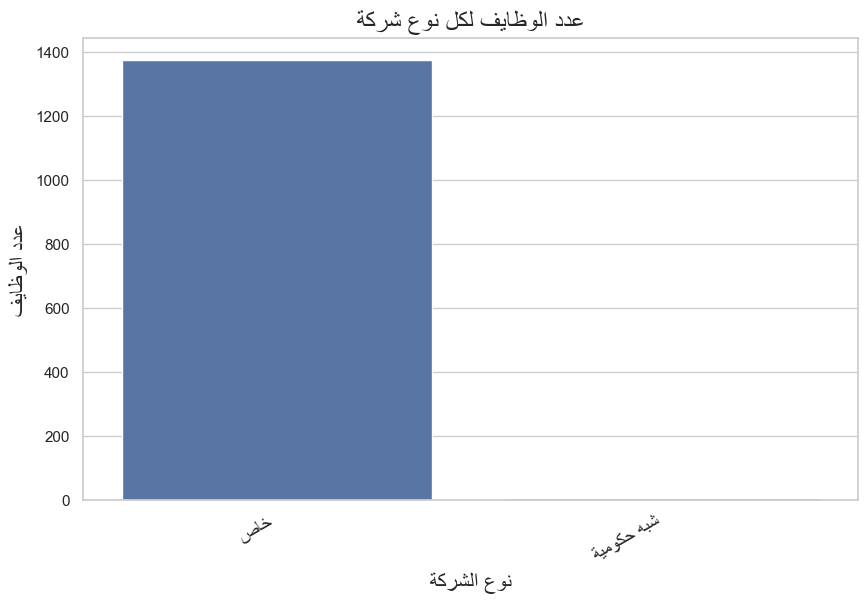

In [1225]:
comp_type_ar = Jadarat['comp_type'].apply(reshape_text)

plt.figure(figsize=(10, 6))
sns.countplot(x=comp_type_ar, order=comp_type_ar.value_counts().index)
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.xlabel(reshape_text("نوع الشركة"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظايف"), fontsize=16)
plt.title(reshape_text("عدد الوظايف لكل نوع شركة"), fontsize=18)
plt.show()


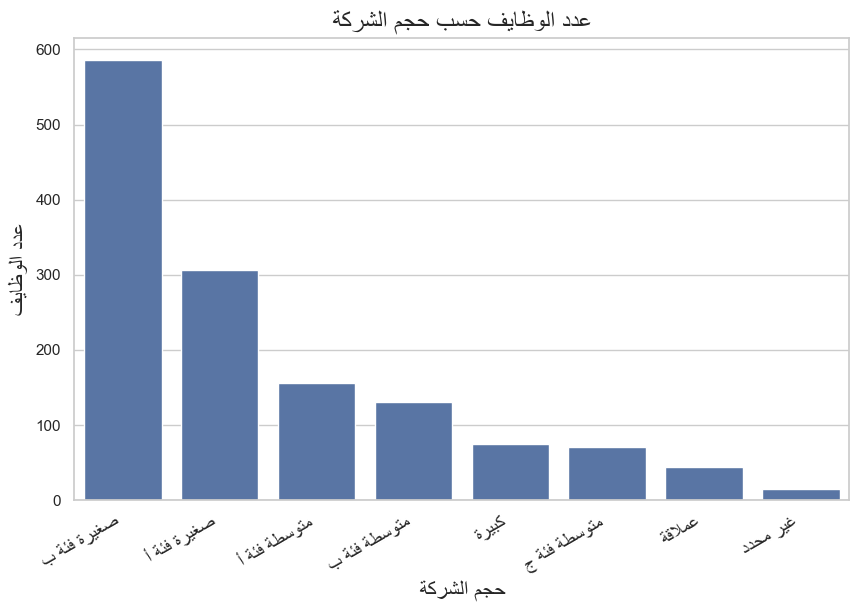

In [1226]:
comp_size_ar = Jadarat['comp_size'].apply(reshape_text)

plt.figure(figsize=(10, 6))
sns.countplot(x=comp_size_ar, order=comp_size_ar.value_counts().index)
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.xlabel(reshape_text("حجم الشركة"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظايف"), fontsize=16)
plt.title(reshape_text("عدد الوظايف حسب حجم الشركة"), fontsize=18)
plt.show()


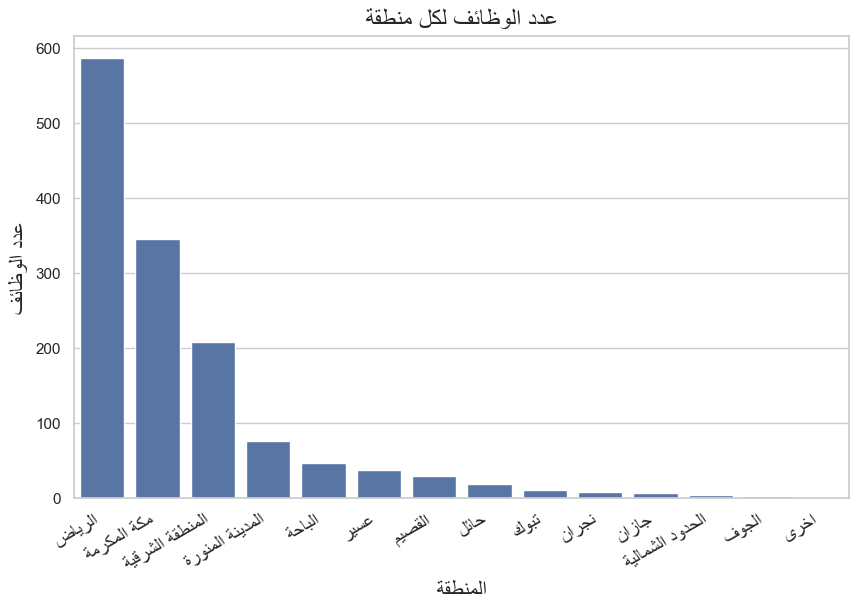

In [1227]:
region_ar = Jadarat['region'].apply(reshape_text)

plt.figure(figsize=(10, 6))
sns.countplot(x=region_ar, order=region_ar.value_counts().index)
plt.xticks(rotation=30, ha='right', fontsize=14)
plt.xlabel(reshape_text("المنطقة"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظائف"), fontsize=16)
plt.title(reshape_text("عدد الوظائف لكل منطقة"), fontsize=18)
plt.show()


In [1228]:
Jadarat.head(3)

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,city,benefits,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary_extracted
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",...,Riyadh,"['Salary', '5000.0']",دوام كامل,0 / 1,20202026350419,0,both,0,1,5000.0
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط', 'العر...",...,Dammam,"['Salary', '5000.0']",دوام كامل,0 / 3,20202026350389,0,both,0,3,5000.0
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",...,Ath Thuma,"['Salary', '4000.0']",دوام كامل,0 / 2,20202026350347,2,both,0,2,4000.0


In [1229]:
Jadarat["city"].unique()

array(['Riyadh', 'Dammam', 'Ath Thuma', 'Hufuf', 'Batali', 'Jeddah',
       'Hail', 'Makkah Al', 'Ghithah', 'Madina', 'Aba Aslab', 'Yanbu',
       'Dhahran', 'Aqiq', 'Uyun', 'Wadi D', 'Tanumah', 'Buraydah',
       'Bishah', 'Hawiya', 'Khubar', 'Khamis Mu', 'Jubail', 'Abraqiyah',
       'Baha', 'Kharj', 'Aba Ki', 'Mubarr', 'Tabuk', 'Yanbu As', 'Badai',
       'Ula', 'Jizan', 'Aqul', 'Salama', 'Qunfid', 'Juranah', 'Taif',
       'Qari', 'Arar', 'Turaif', 'Biljurash', 'Unayzah', 'Abm', 'Aba Ba',
       'Shibriqah', 'Najran', 'Tubarjal', 'Umm Talha', 'Hawtba', 'Abu Sa',
       'Watah', 'Qurayy', 'Qatif', 'Aydab', 'Lith', 'Sabya', 'Khurma',
       'Qawz', 'Jurf', 'Haql', 'Abu Tarfa', 'Tumair', 'Buqayq', 'Qalt',
       'Abraq An', 'Diriy', 'Abha', 'Ath Thuqb', 'Hafal', 'Naqa',
       'Saffan', 'Baydah', 'Atawla', 'Hafair', 'Rahimah', 'Bukayr',
       'Aba Qi', 'Ammar', 'Shuqay', 'Yanbu Al', 'Sakaka', 'Abu Marag',
       'Ufayr', 'Halqah', 'Muhayil', 'Quz', 'Rass', 'Ahrifa', 'Hifah',
       '

/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_10613/924402424.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




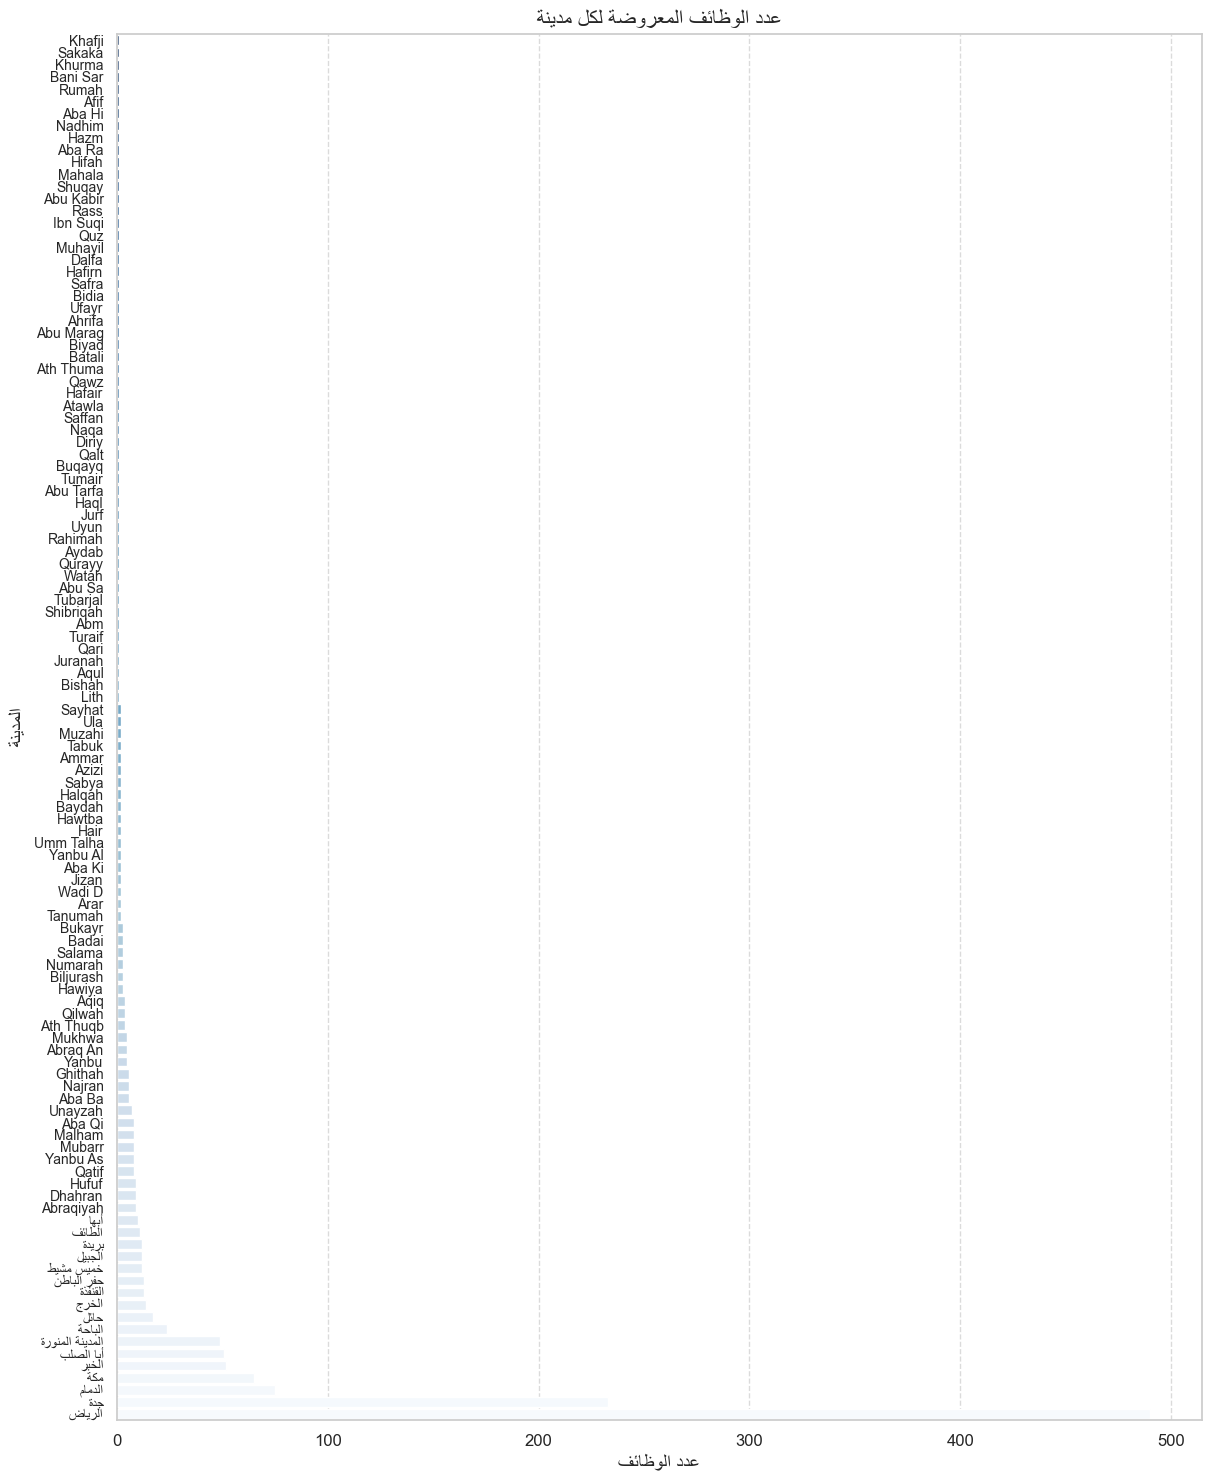

In [1230]:
city_ar = Jadarat['city'].map(city_translation).fillna(Jadarat['city'])
city_ar = city_ar.apply(reshape_text)

city_counts = city_ar.value_counts()
plt.figure(figsize=(14, 18))  # زيادة الحجم
sorted_cities = city_counts.sort_values()  # ترتيب المدن تصاعديًا لتحسين الرسم الأفقي
sns.barplot(x=sorted_cities.values, y=sorted_cities.index, palette='Blues_r')

plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel(reshape_text("عدد الوظائف"), fontsize=14)
plt.ylabel(reshape_text("المدينة"), fontsize=14)
plt.title(reshape_text("عدد الوظائف المعروضة لكل مدينة"), fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # خطوط شبكية لتحسين القراءة

plt.show()



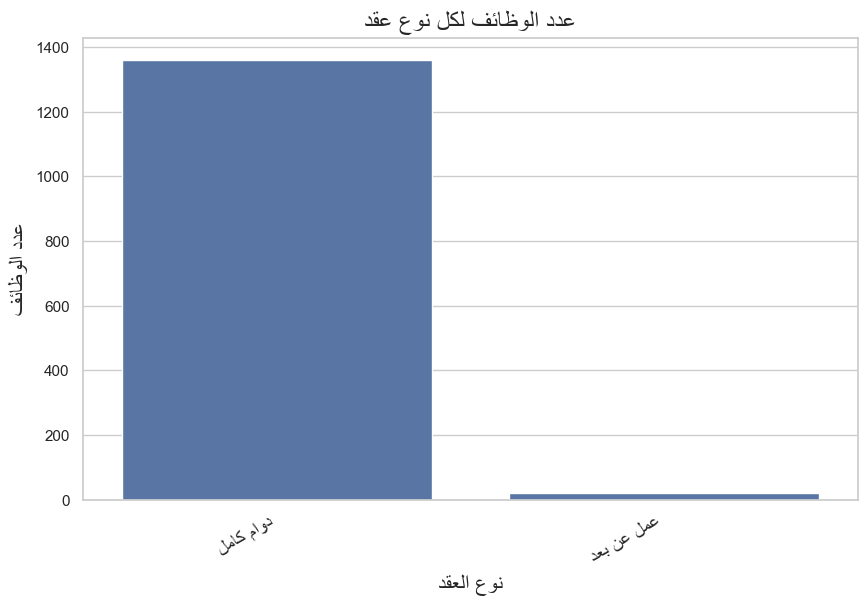

In [1231]:
plt.figure(figsize=(10, 6))

contract_ar = Jadarat['contract'].dropna().apply(reshape_text)

sns.countplot(x=contract_ar, order=contract_ar.value_counts().index)

plt.xticks(rotation=30, ha='right', fontsize=14)
plt.xlabel(reshape_text("نوع العقد"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظائف"), fontsize=16)
plt.title(reshape_text("عدد الوظائف لكل نوع عقد"), fontsize=18)

plt.show()


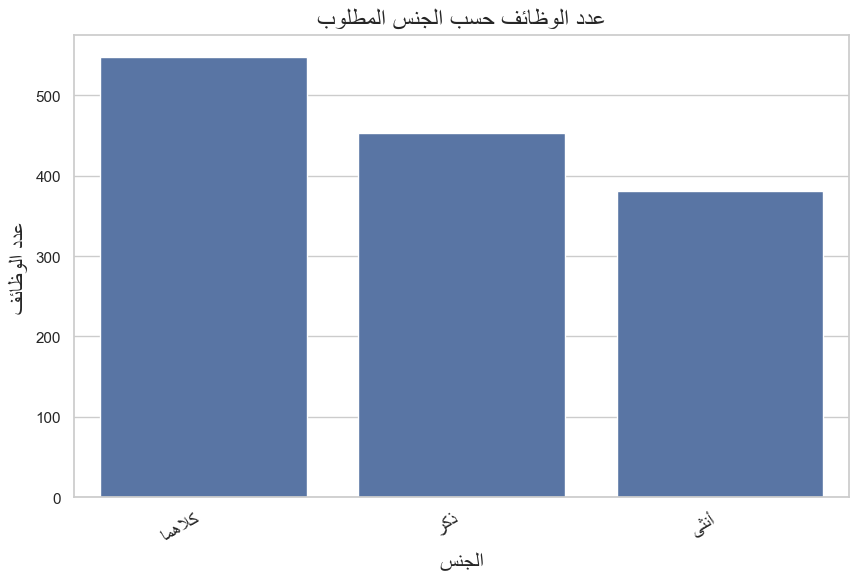

In [1232]:
plt.rcParams['font.family'] = 'Arial'

gender_mapping = {
    "M": "ذكر",
    "F": "أنثى",
    "both": "كلاهما"
}

gender_ar = Jadarat['gender'].map(gender_mapping).dropna()
gender_ar = gender_ar.apply(lambda x: get_display(arabic_reshaper.reshape(x)))

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

ax = sns.countplot(x=gender_ar, order=gender_ar.value_counts().index)

plt.xticks(rotation=30, ha='right', fontsize=14)
plt.xlabel(get_display(arabic_reshaper.reshape("الجنس")), fontsize=16)
plt.ylabel(get_display(arabic_reshaper.reshape("عدد الوظائف")), fontsize=16)
plt.title(get_display(arabic_reshaper.reshape("عدد الوظائف حسب الجنس المطلوب")), fontsize=18)

plt.show()


#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [1233]:
Jadarat["available_positions"].value_counts()

available_positions
0    1381
Name: count, dtype: int64

In [1234]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary_extracted'],
      dtype='object')

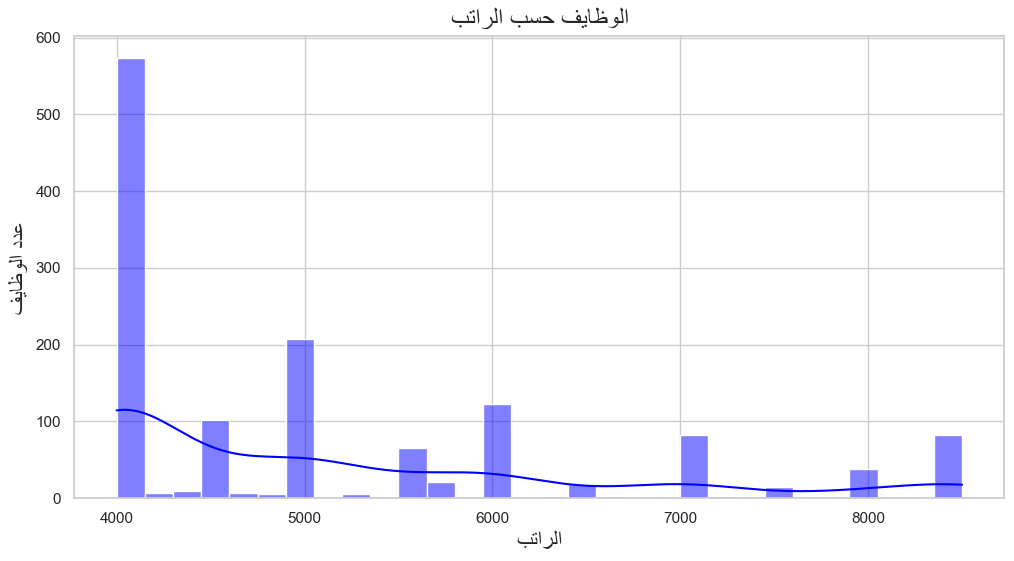

In [1235]:
plt.figure(figsize=(12, 6))
sns.histplot(Jadarat['salary_extracted'], bins=30, kde=True, color='blue')
plt.xlabel(reshape_text("الراتب"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظايف"), fontsize=16)
plt.title(reshape_text(" الوظايف حسب الراتب "), fontsize=18)
plt.show()

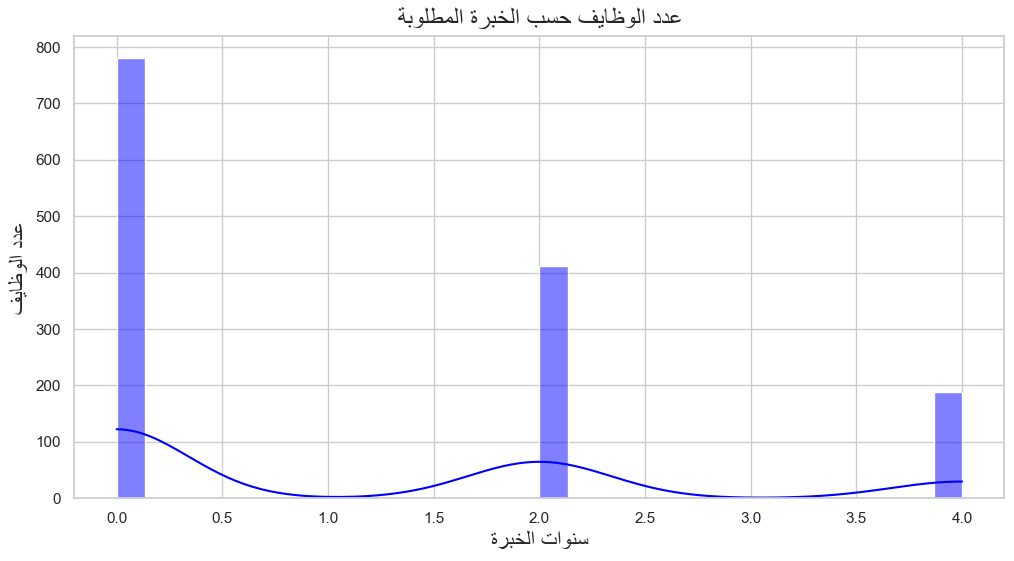

In [1236]:
plt.figure(figsize=(12, 6))
sns.histplot(Jadarat['experience_years'], bins=30, kde=True, color='blue')
plt.xlabel(reshape_text("سنوات الخبرة"), fontsize=16)
plt.ylabel(reshape_text("عدد الوظايف"), fontsize=16)
plt.title(reshape_text("عدد الوظايف حسب الخبرة المطلوبة"), fontsize=18)
plt.show()

In [1237]:
Jadarat.columns


Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary_extracted'],
      dtype='object')

Measures of Central Tendency

In [1238]:
# The average salary is 5138.56, with the middle value (median) being 4500.0, indicating a positive skew
mean_salary = Jadarat['salary_extracted'].mean()
median_salary = Jadarat['salary_extracted'].median()
mode_salary = Jadarat['salary_extracted'].mode()[0]  

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")


Mean Salary: 5138.555394641564
Median Salary: 4500.0
Mode Salary: 4000.0


Measures of Variability

In [1239]:
#The salaries have high variability, with a standard deviation of 1371.45. This means salaries differ significantly from the average
variance_salary = Jadarat['salary_extracted'].var()
std_dev_salary = Jadarat['salary_extracted'].std()
range_salary = Jadarat['salary_extracted'].max() - Jadarat['salary_extracted'].min()

print(f"Variance Salary: {variance_salary}")
print(f"Standard Deviation Salary: {std_dev_salary}")
print(f"Range of Salary: {range_salary}")


Variance Salary: 1880875.6949364566
Standard Deviation Salary: 1371.4502159890662
Range of Salary: 4500.0


Measures of Distribution Shape

In [1240]:
#The positive skew (1.147) suggests that the salary distribution has a rightward tail, with higher salaries pulling the average up.
skewness_salary = Jadarat['salary_extracted'].skew()
print(f"Skewness Salary: {skewness_salary}")

Skewness Salary: 1.1479571875548673



## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart


**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

### 1. What proportion of job postings is attributed to each region within the




In [1241]:
import plotly.express as px


region_counts = Jadarat['region'].value_counts().reset_index()
region_counts.columns = ['المنطقة', 'عدد الوظايف']


fig = px.bar(
    region_counts, 
    x="عدد الوظايف", 
    y="المنطقة", 
    orientation="h", 
    text="عدد الوظايف", 
    color="عدد الوظايف",  
    color_continuous_scale=px.colors.sequential.Purples  
)


fig.update_traces(
    textposition="inside", 
    textfont_size=14, 
    marker_line_width=2 
)

fig.update_layout(
    title="عدد الوظايف حسب المنطقة",
    title_font_size=18,
    xaxis_title="عدد الوظايف",
    yaxis_title="المنطقة",
    template="plotly_white",
)


fig.show()


In [1242]:
region_counts = Jadarat['region'].value_counts()
region_counts

region
الرياض             587
مكة المكرمة        346
المنطقة الشرقية    208
المدينة المنورة     76
الباحة              46
عسير                37
القصيم              29
حائل                18
تبوك                11
نجران                8
جازان                7
الحدود الشمالية      4
الجوف                3
اخرى                 1
Name: count, dtype: int64

### 2. Is there a gender preference indicated in the job postings?


In [1243]:
# Gender distribution count of job postings for each gender
gender_distribution = Jadarat['gender'].value_counts()

# Output the gender distribution 
print("Gender Distribution (Count):")
print(gender_distribution)



Gender Distribution (Count):
gender
both    547
M       453
F       381
Name: count, dtype: int64


In [1244]:
import plotly.express as px

gender_counts = Jadarat['gender'].value_counts().reset_index()
gender_counts.columns = ['الجنس', 'عدد الوظائف']

gender_counts['الجنس'] = gender_counts['الجنس'].replace({"M": "ذكر", "F": "أنثى", "both": "كلاهما"})

fig = px.bar(
    gender_counts, 
    x="عدد الوظائف", 
    y="الجنس", 
    orientation="h", 
    text="عدد الوظائف", 
    color="عدد الوظائف",  
    color_continuous_scale=px.colors.sequential.Purples  
)

fig.update_traces(
    textposition="inside", 
    textfont_size=14, 
    marker_line_width=2 
)
fig.update_layout(
    title="توزيع الوظائف حسب الجنس",
    title_font_size=18,
    xaxis_title="عدد الوظائف",
    yaxis_title="الجنس",
    template="plotly_white",
)

fig.show()


### 3. What is the expected salary range for fresh graduates?

In [1245]:
min_salary = Jadarat['salary_extracted'].min()
max_salary = Jadarat['salary_extracted'].max()

print(f" أقل راتب: {min_salary} ريال")
print(f"أعلى راتب: {max_salary} ريال")


 أقل راتب: 4000.0 ريال
أعلى راتب: 8500.0 ريال


In [1246]:
fresh_graduates = Jadarat[Jadarat['experience_years'] == 0]

mean_salary = fresh_graduates['salary_extracted'].mean()
min_salary = fresh_graduates['salary_extracted'].min()
max_salary = fresh_graduates['salary_extracted'].max()

In [1247]:
import plotly.graph_objects as go
salary_data = {
    "المؤشر": ["متوسط الراتب", "الحد الأدنى", "الحد الأعلى"],
    "الراتب (ريال)": [f"{mean_salary:.2f}", f"{min_salary:.2f}", f"{max_salary:.2f}"]
}


salary_df = pd.DataFrame(salary_data)


fig = go.Figure(data=[go.Table(
    header=dict(values=["المؤشر", "الراتب (ريال)"],
                fill_color='purple',
                align='center',
                font=dict(color='white', size=16)),
    cells=dict(values=[salary_df["المؤشر"], salary_df["الراتب (ريال)"]],
               fill_color='lavender',
               align='center',
               font=dict(size=14)))
])

fig.update_layout(
    title="متوسط ونطاق الرواتب للخريجين الجدد",
    title_x=0.5  
)
fig.show()



### 4. Are job opportunities predominantly targeted at individuals with experience, or is there room for fresh graduates as well?


In [1248]:
import plotly.express as px

Jadarat['experience_category'] = Jadarat['experience_years'].apply(lambda x: 'ذو خبرة' if int(x) > 0 else 'حديث لتخرج')

experience_counts = Jadarat['experience_category'].value_counts().reset_index()
experience_counts.columns = ['الفئة', 'عدد الوظائف']

fig = px.bar(
    experience_counts, 
    x="عدد الوظائف", 
    y="الفئة", 
    orientation="h", 
    text="عدد الوظائف", 
    color="عدد الوظائف",  
    color_continuous_scale="blues"
)

fig.update_traces(
    textposition="inside", 
    textfont_size=14, 
    marker_line_width=2 
)

fig.update_layout(
    title="توزيع الوظائف حسب الخبرة",
    title_font_size=18,
    xaxis_title="عدد الوظائف",
    yaxis_title="الفئة",
    template="plotly_white",
)

fig.show()


#### وضع الوظايف في فئات

In [1250]:
num_unique_titles = Jadarat['job_title'].nunique()
print(f"عدد المسميات الوظيفية الفريدة: {num_unique_titles}")


عدد المسميات الوظيفية الفريدة: 324


In [1251]:
Jadarat['job_title'].unique()

array(['محاسب', 'بائع', 'أخصائي عمليات موارد بشرية', 'ميكانيكي سيارات',
       'مراقب كاميرات أمنية', 'سكرتير تنفيذي', 'مدير مكتب',
       'أخصائي إدارة مشاريع', 'مصمم جرافيك', 'أخصائي ذكاء أعمال',
       'محلل بيانات', 'مدير حساب عميل', 'مدخل بيانات', 'مطور برامج',
       'أخصائي إدارة اداء', 'كيميائي', 'مهندس زراعي',
       'محلل نظم المعلومات', 'مدير عام', 'مساعد إداري',
       'كاتب علاقات حكومية', 'مندوب مبيعات', 'معلم حضانة', 'فني كيميائي',
       'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'مدير فرع',
       'موظف استقبال فندق', 'أخصائي تسويق',
       'كاتب استعلامات مركز خدمة عملاء', 'أخصائي خدمة عملاء',
       'أخصائي جودة', 'معلم صفوف أولية', 'مساعد طب بيطري', 'صيدلي',
       'مهندس معماري داخلي', 'مهندس معماري', 'بائع مأكولات ومشروبات',
       'خطاط', 'منسق زهور', 'أخصائي تطوير إداري', 'مدير تسويق',
       'مدير خدمة العملاء', 'مندوب مشتريات', 'فني تدفئة وتهوية وتكييف',
       'مدير رقابة ادارية', 'موظف صندوق محاسبة', 

In [1252]:
import pandas as pd

job_array = ['محاسب', 'بائع', 'أخصائي عمليات موارد بشرية', 'ميكانيكي سيارات',
       'مراقب كاميرات أمنية', 'سكرتير تنفيذي', 'مدير مكتب',
       'أخصائي إدارة مشاريع', 'مصمم جرافيك', 'أخصائي ذكاء أعمال',
       'محلل بيانات', 'مدير حساب عميل', 'مدخل بيانات', 'مطور برامج',
       'أخصائي إدارة اداء', 'كيميائي', 'مهندس زراعي',
       'محلل نظم المعلومات', 'مدير عام', 'مساعد إداري',
       'كاتب علاقات حكومية', 'مندوب مبيعات', 'معلم حضانة', 'فني كيميائي',
       'مهندس كهربائي', 'مهندس ميكانيكي', 'مدير إداري',
       'فني هندسة ميكانيكية', 'فني هندسة كهربائية', 'مدير فرع',
       'موظف استقبال فندق', 'أخصائي تسويق',
       'كاتب استعلامات مركز خدمة عملاء', 'أخصائي خدمة عملاء',
       'أخصائي جودة', 'معلم صفوف أولية', 'مساعد طب بيطري', 'صيدلي',
       'مهندس معماري داخلي', 'مهندس معماري', 'بائع مأكولات ومشروبات',
       'خطاط', 'منسق زهور', 'أخصائي تطوير إداري', 'مدير تسويق',
       'مدير خدمة العملاء', 'مندوب مشتريات', 'فني تدفئة وتهوية وتكييف',
       'مدير رقابة ادارية', 'موظف صندوق محاسبة', 'مدير تدريب', 'حارس أمن',
       'طبيب أمراض جلدية', 'نادل', 'كاتب موارد بشرية', 'معلم ثانوي أحياء',
       'معلم ثانوي لغة عربية', 'مهندس مدني', 'فني مختبر طبي',
       'فني هندسة إلكترونية', 'سكرتير', 'مشرف مسكن', 'مصمم وسائط متعددة',
       'سائق شاحنة ثقيلة', 'مدير عمليات موارد بشرية', 'عامل تصنيع',
       'عامل كاونتر مأكولات ومشروبات', 'فني طوابع', 'طاهي', 'صراف عملات',
       'مدير شؤون قانونية', 'مهندس كيميائي', 'فني انتاج مشتقات نفطية',
       'موظف استقبال', 'أخصائي توظيف', 'محصل', 'أخصائي تغذية',
       'مهندس تقنية معلومات', 'فني صيانة ميكانيكية', 'مساح إحصائي',
       'فني مواد إنشائية', 'فني طرق', 'مهندس مواد', 'طبيب أسنان عام',
       'سائق سيارة', 'سائق حافلة', 'منسق منتجات', 'إداري مواقع إلكترونية',
       'فني صيانة أجهزة إلكترونية', 'أخصائي مشتريات', 'سكرتير طبي',
       'فني علاج طبيعي', 'أخصائي علاج طبيعي', 'مشرف موقع إنشائي',
       'مهندس نظم تقنية معلومات', 'مدير برمجيات',
       'فني شبكات تقنية معلومات', 'اخصائي دعم فني', 'مشرف صيانة',
       'مشرف تنظيف وتدبير', 'أخصائي مستودعات', 'بائع احذية وحقائب',
       'سائق معدات ثقيلة', 'محامي', 'أخصائي سمعيات', 'مشرف تصنيع',
       'أخصائي علوم حشرات', 'أخصائي مبيعات', 'مدير متجر', 'أخصائي نفسي',
       'مشرف إنشاء مباني', 'أخصائي قانوني', 'مدير صيانة',
       'فني ميكانيكي محركات', 'جندي أمن', 'طبيب عام', 'طبيب نفسي',
       'أخصائي علاقات عامة', 'أخصائي مختبرات طبية', 'فني أشعة',
       'محضر أطعمة باردة', 'أخصائي صحة عامة', 'فني أجهزة إلكترونية',
       'أمين مخزن', 'بائع عطور', 'فني تجهيز طباعة', 'حاضنة أطفال',
       'مدرب علوم تطبيقية', 'معلم ابتدائي تربية فنية',
       'معلم مرحلة متوسطة حاسب آلي', 'معلم ابتدائي حاسب آلي',
       'بائع ملابس جاهزة', 'فني كهربائي تمديدات كهربائية',
       'أخصائي أسرة وطفولة', 'فني تشغيل محطة غاز', 'عامل مكافحة آفات',
       'فني أجهزة دقيقة', 'مدير تقنية معلومات', 'رئيس منظمة غير ربحية',
       'مدرس لغة أجنبية', 'مدير علاقات الأفراد', 'مساعد معلم',
       'أخصائي تقنية إشعاعية', 'مشرف صحة وسلامة مهنية', 'أمين صندوق',
       'مساعد طبيب أسنان', 'مدير توظيف', 'فني تمريض',
       'معلم ابتدائي لغة أجنبية', 'معلم مرحلة متوسطة لغة عربية',
       'سائق شاحنة صغيرة', 'فني كهربائي أنظمة حماية كهربائية',
       'مساعد صحي', 'محاسب تكاليف', 'مراقب مالي', 'قهوجي', 'مشرف عقار',
       'ميكانيكي مصاعد', 'أمين مكتبة', 'معلم رياض أطفال',
       'معلم صعوبات التعلم', 'مدير مطعم', 'مدير مقهى', 'مشرف إنتاج',
       'مهندس سلامة وصحة مهنية', 'قائد مدرسة', 'نجّار', 'مليّس',
       'أخصائي صحة وسلامة مهنية', 'بائع ساعات', 'فني تنقية مجاري صرف صحي',
       'أخصائي إعلامي', 'معد وجبات سريعة', 'فني علوم أغذية',
       'أخصائي تمريض', 'مدير عمليات تشغيل', 'بائع هاتفي', 'أمين متجر',
       'مدير طباعة ونشر', 'مبرمج قاعدة بيانات', 'فني نظم حاسب آلي',
       'معالج صحة فم وأسنان', 'أخصائي أنشطة ثقافية', 'وسيط عقاري',
       'مدير خدمات أطعمة ومشروبات', 'أخصائي مبيعات مستلزمات طبية',
       'سكرتير قانوني', 'عامل تعبئة وتغليف', 'فني نظارات', 'فارز بريدي',
       'مراقب الجودة', 'مشغل آلة درفلة معادن', 'بائع قطع غيار مركبات',
       'كهربائي مباني', 'مدير حسابات', 'فني دعم تقنية معلومات',
       'أخصائي تدريب وتطوير موارد بشرية',
       'معلم ابتدائي إجتماعيات ولغة عربية وإسلاميات',
       'معلم ثانوي لغة أجنبية', 'معلم ابتدائي علوم ورياضيات',
       'وكيل مدرسة', 'معلم ثانوي فيزياء', 'أخصائي استمرارية الأعمال',
       'مشغل مقسم هاتف', 'أخصائي تنظيم إداري',
       'ميكانيكي تدفئة وتهوية وتكييف', 'فني كهربائي شبكات توزيع أرضية',
       'كاتب اتصال', 'معلم ثانوي اجتماعيات', 'معلم ثانوي كيمياء',
       'فني جودة', 'مطور مواقع الكترونية', 'أخصائي إدارة شبكات',
       'محلل أمن نظم', 'مدير قواعد بيانات', 'أخصائي أمن بيانات',
       'مهندس شبكات', 'مدير أنظمة تقنية معلومات', 'أخصائي حوسبة سحابية',
       'أخصائي خوادم', 'أخصائي اضطرابات تخاطب', 'معلم ابتدائي',
       'مساعد رعاية مرضى', 'بائع مجوهرات',
       'أخصائي تنظيم مؤتمرات وفعاليات', 'مدير إعلام رقمي', 'مدرب مهني',
       'مدرب أعمال وإدارة', 'مشغل آلة تعبئة منتجات كيميائية', 'فني معادن',
       'فني كهربائي شبكات توزيع هوائية', 'بائع ادوات واجهزة منزلية',
       'مهندس حاسب آلي', 'كاتب تذاكر سفر', 'قاطع تذاكر نقل', 'مدير أوقاف',
       'بائع اثاث', 'محلل مبرمج', 'مصمم أثاث', 'مدير مبيعات جملة',
       'رئيس تنفيذي', 'أخصائي مبيعات منتجات صيدلانية', 'فني كهروميكانيك',
       'صانع حلويات', 'مترجم', 'مدير موارد بشرية أمن سيبراني', 'كاتب شحن',
       'مصمم إعلان', 'كاتب استعلامات',
       'أخصائي مبيعات نظم تقنية المعلومات والاتصالات', 'كهربائي سيارات',
       'مبرمج تطبيقات', 'مهندس صناعي', 'أخصائي جغرافيا', 'أخصائي بصريات',
       'كاتب رواتب', 'مدير مستودع', 'مراجع داخلي', 'مصفف شعر',
       'مهندس إلكترونيات', 'كاتب استقبال مرضى', 'مدير عمليات سلامة',
       'فني عمليات تقنية معلومات', 'طيار جناح ثابت', 'مدير مالي',
       'مساح كميات', 'فني هندسة مدنية', 'أخصائي أمراض نطق وسمع',
       'مدير أشغال ومرافق عامة', 'فني صيانة مباني',
       'فني ميكانيكي تمديدات صحية وتدفئة وغاز', 'فني تغذية',
       'سائق رافعة شوكية', 'أخصائي استشارات أعمال', 'كاتب إنتاج',
       'مدير تطوير موارد بشرية', 'مراقب متجر', 'سباك', 'بناء', 'دهّان',
       'مدير متابعة وأداء مؤسسي', 'مراقب خدمات عامة',
       'مشغل آلة صناعات كيميائية', 'مدير إدارة مشاريع',
       'فني مواقع إلكترونية', 'مبلط', 'معلم ثانوي رياضيات', 'بائع كشك',
       'مدير مركز رعاية ذوي الاعاقة', 'محرر صحفي', 'فني إنشاءات',
       'فني حساب كميات', 'فني مساحة', 'فني صيانة انشاءات',
       'فني شبكات اتصالات', 'أخصائي أنشطة طلابية', 'محضر مختبر علوم',
       'مرشد طلابي', 'كاتب بيانات عملاء', 'أخصائي بيانات ضخمة',
       'مخلص جمركي', 'مهندس إدارة مشاريع', 'فني أجهزة طبية', 'بائع مباشر',
       'فني تصميم داخلي', 'مهندس إنتاج', 'أخصائي تأمين', 'مراسل',
       'مسؤول تراخيص وتصاريح', 'مدير بحث وتطوير', 'مهندس بيئي',
       'مشغل آلات تصنيع منتجات بلاستيكية', 'أخصائي علاج وظيفي', 'خياط',
       'رسام خرائط', 'مأمور سنترال', 'محقق مالي', 'مدير خدمات مشتركة',
       'مصنف أطعمة ومشروبات', 'أخصائي علوم أحياء دقيقة',
       'نجار هياكل خشبية', 'مدير مشتريات', 'مشرف مدخلي البيانات',
       'مشغل آلة تشطيب رخام']


job_array = [job.replace("اخصائي", "أخصائي") for job in job_array]
job_array = [job.replace("نجّار", "نجار") for job in job_array]


data = []
for job in job_array:
    first_word = job.split()[0]  
    data.append((first_word, job))


Jadarat['job_category'] = Jadarat['job_title'].apply(lambda x: x.split()[0])



In [1253]:
Jadarat['job_category'].unique()

array(['محاسب', 'بائع', 'أخصائي', 'ميكانيكي', 'مراقب', 'سكرتير', 'مدير',
       'مصمم', 'محلل', 'مدخل', 'مطور', 'كيميائي', 'مهندس', 'مساعد',
       'كاتب', 'مندوب', 'معلم', 'فني', 'موظف', 'صيدلي', 'خطاط', 'منسق',
       'حارس', 'طبيب', 'نادل', 'مشرف', 'سائق', 'عامل', 'طاهي', 'صراف',
       'محصل', 'مساح', 'إداري', 'اخصائي', 'محامي', 'جندي', 'محضر', 'أمين',
       'حاضنة', 'مدرب', 'رئيس', 'مدرس', 'قهوجي', 'قائد', 'نجّار', 'مليّس',
       'معد', 'مبرمج', 'معالج', 'وسيط', 'فارز', 'مشغل', 'كهربائي', 'وكيل',
       'قاطع', 'صانع', 'مترجم', 'مراجع', 'مصفف', 'طيار', 'سباك', 'بناء',
       'دهّان', 'مبلط', 'محرر', 'مرشد', 'مخلص', 'مراسل', 'مسؤول', 'خياط',
       'رسام', 'مأمور', 'محقق', 'مصنف', 'نجار'], dtype=object)

In [1254]:
Jadarat.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary_extracted', 'experience_category', 'job_category'],
      dtype='object')


أخصائي    215
بائع      127
مدير      110
فني       106
مهندس      99

In [1255]:
top_categories = Jadarat["job_category"].value_counts().head(20)

top_categories

job_category
أخصائي    215
بائع      127
مدير      110
فني       106
مهندس      99
موظف       85
محاسب      84
مساعد      56
سكرتير     45
كاتب       45
مندوب      44
سائق       28
مشرف       27
معلم       27
عامل       26
مدخل       21
محامي      19
مصمم       18
نادل       16
طبيب       13
Name: count, dtype: int64

### My Analysis

In [ ]:
import plotly.express as px

job_titles_counts = Jadarat['job_title'].value_counts().reset_index()
job_titles_counts.columns = ['المسمى الوظيفي', 'عدد الوظائف']

top_20_jobs = job_titles_counts.head(20)

fig = px.bar(
    top_20_jobs, 
    x="عدد الوظائف", 
    y="المسمى الوظيفي", 
    orientation="h", 
    text="عدد الوظائف", 
    color="عدد الوظائف",  
    color_continuous_scale="blues"
)

fig.update_traces(
    textposition="inside", 
    textfont_size=14, 
    marker_line_width=2 
)

fig.update_layout(
    title="أكثر 20 مسمى وظيفي طلبًا",
    title_x=0.5,
    title_font_size=18,
    xaxis_title="عدد الوظائف",
    yaxis_title="المسمى الوظيفي",
    template="plotly_white",
    height=800 
)

fig.show()


In [1259]:
import plotly.graph_objects as go
salary_data = {
    "المؤشر": ["متوسط الراتب", "الحد الأدنى", "الحد الأعلى"],
    "الراتب (ريال)": [f"{mean_salary:.2f}", f"{min_salary:.2f}", f"{max_salary:.2f}"]
}


salary_df = pd.DataFrame(salary_data)


fig = go.Figure(data=[go.Table(
    header=dict(values=["المؤشر", "الراتب (ريال)"],
                fill_color='purple',
                align='center',
                font=dict(color='white', size=16)),
    cells=dict(values=[salary_df["المؤشر"], salary_df["الراتب (ريال)"]],
               fill_color='lavender',
               align='center',
               font=dict(size=14)))
])

fig.update_layout(
    title="متوسط ونطاق الرواتب للخريجين الجدد",
    title_x=0.5  
)
fig.show()

In [1260]:
import plotly.express as px


region_counts = Jadarat['region'].value_counts().reset_index()
region_counts.columns = ['المنطقة', 'عدد الوظايف']


fig = px.bar(
    region_counts, 
    x="عدد الوظايف", 
    y="المنطقة", 
    orientation="h", 
    text="عدد الوظايف", 
    color="عدد الوظايف",  
    color_continuous_scale="blues"  
)


fig.update_traces(
    textposition="inside", 
    textfont_size=14, 
    marker_line_width=2 
)

fig.update_layout(
    title="عدد الوظايف حسب المنطقة",
    title_x=0.5,
    title_font_size=18,
    xaxis_title="عدد الوظايف",
    yaxis_title="المنطقة",
    template="plotly_white",
)


fig.show()


In [1261]:
Jadarat[Jadarat['comp_type'] == "شبه حكومية"]

,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary_extracted,experience_category,job_category
273,أخصائي خدمة عملاء,18/04/1444,['وضع وتحديد مؤشرات ومعايير الأداء والجودة في ...,[' إجراء الدراسات والتحاليل المتخصصة بهدف وض...,شركه روائع ابداعيه للتدريب المهني,EST-1493,شبه حكومية,كبيرة,المطاعم مع الخدمة,"['Language data', 'اللغه الإنجليزية', 'محترف']",...,دوام كامل,0 / 7,20202026247681,0,both,0,7,6000.0,حديث لتخرج,أخصائي
274,أخصائي أسرة وطفولة,16/04/1444,['تحديد الاحتياجات والمشاكل والتحديات المتعلقة...,[' إجراء الدراسات والتحاليل المتخصصة المتعلق...,جمعية بناء للإرشاد الأسري,EST-1619,شبه حكومية,كبيرة,المطاعم مع الخدمة,"['Language data', 'الانجليزية', 'متوسط']",...,دوام كامل,0 / 2,20202026247680,0,F,0,2,4000.0,حديث لتخرج,أخصائي
538,محاسب,06/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,جمعية الدعوة والارشاد وتوعية الجاليات في الصنا...,EST-118,شبه حكومية,كبيرة,البيع بالتجزئة لوقود السيارات والدراجات الناري...,"['Language data', 'الانجليزية', 'متوسط']",...,دوام كامل,0 / 1,20202026314310,0,M,0,1,7000.0,حديث لتخرج,محاسب
742,رئيس تنفيذي,19/05/1444,['المشاركة في وضع الأهداف والخطط الإستراتيجية ...,[' المشاركة في وضع الإستراتيجية العامة وتحقي...,جاروديه الخيريه للخدمات الاجتماعيه /جمعيه,EST-282,شبه حكومية,كبيرة,unknown,"['Language data', 'العربيه', 'محترف', 'انجليزي...",...,دوام كامل,0 / 1,20202026339202,0,M,0,1,8500.0,حديث لتخرج,رئيس
947,أخصائي استشارات أعمال,08/06/1444,['الشؤون الصحية بوزارة الحرس الوطني تبحث عن اخ...,[' تقديم استشارات لتطوير الأهداف الرئيسيةفي...,برنامج مستشفى الملك فهدللحرس الوطني,EST-1237,شبه حكومية,كبيرة,unknown,"['Language data', 'اللغة الإنجليزية ', 'محترف']",...,دوام كامل,0 / 1,20202026390144,4,both,0,1,8500.0,ذو خبرة,أخصائي


In [ ]:
comp_type_counts = Jadarat['comp_type'].value_counts().reset_index()
comp_type_counts.columns = ['نوع الشركة', 'عدد الوظائف']

fig = px.bar(
    comp_type_counts, 
    x="عدد الوظائف", 
    y="نوع الشركة", 
    orientation="h",  
    text="عدد الوظائف",  
    color="عدد الوظائف",  
    color_continuous_scale="Blues"  
)

fig.update_traces(
    textposition="inside",  
    textfont_size=14,  
    marker_line_width=2  
)

fig.update_layout(
    title="عدد الوظايف لكل نوع شركة",
    title_x=0.5,  
    title_font_size=18,  
    xaxis_title="عدد الوظائف",
    yaxis_title="نوع الشركة",
    template="plotly_white",  
)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

salary_by_type = Jadarat[Jadarat['comp_type'].isin(['خاص', 'شبه حكومية'])]

salary_stats = salary_by_type.groupby('comp_type')['salary_extracted'].agg(['mean', 'min', 'max', 'count']).reset_index()

salary_stats.columns = ['نوع الشركة', 'متوسط الراتب', 'الحد الأدنى', 'الحد الأعلى', 'عدد الرواتب']


salary_stats[['متوسط الراتب', 'الحد الأدنى', 'الحد الأعلى']] = salary_stats[['متوسط الراتب', 'الحد الأدنى', 'الحد الأعلى']].round(2)


salary_stats['التوضيح'] = salary_stats.apply(lambda row: f" عدد الرواتب لحساب المتوسط: {row['عدد الرواتب']}", axis=1)


fig = px.bar(
    salary_stats, 
    x="نوع الشركة", 
    y=["متوسط الراتب", "الحد الأدنى", "الحد الأعلى"], 
    barmode="group",
    text_auto=True,
    color_discrete_map={"متوسط الراتب": "blue", "الحد الأدنى": "lightblue", "الحد الأعلى": "darkblue"}
)


fig.update_layout(
    title="تحليل رواتب القطاع الخاص وشبه الحكومي",
    title_x=0.5,
    title_font_size=18,
    xaxis_title="نوع الشركة",
    yaxis_title="الراتب (ريال)",
    template="plotly_white",
    annotations=[
        dict(
            x=row["نوع الشركة"],
            y=row["الحد الأعلى"] + 1000,  
            text=row["التوضيح"],
            showarrow=False,
            font=dict(size=14, color="black")
        ) for _, row in salary_stats.iterrows()
    ]
)


fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


gender_mapping = {
    "M": "ذكر",
    "F": "أنثى",
    "both": "كلاهما"
}


gender_ar = Jadarat['gender'].map(gender_mapping).dropna()


gender_counts = gender_ar.value_counts().reset_index()
gender_counts.columns = ["الجنس", "عدد الوظائف"]


fig = px.bar(
    gender_counts, 
    x="الجنس", 
    y="عدد الوظائف", 
    text="عدد الوظائف",
    color="الجنس",  
    color_discrete_map={"ذكر": "blue", "أنثى": "pink", "كلاهما": "gray"}  
)


fig.update_traces(
    textposition="inside",
    textfont_size=14,
    marker_line_width=2
)

fig.update_layout(
    title="عدد الوظائف حسب الجنس المطلوب",
    title_x=0.5,
    title_font_size=18,
    xaxis_title="الجنس",
    yaxis_title="عدد الوظائف",
    template="plotly_white"
)

# عرض المخطط
fig.show()


In [1265]:

Jadarat.to_csv('Jadaratcleaned_dataset.csv', index=False)



In [1266]:

df_loaded = pd.read_csv('Jadaratcleaned_dataset.csv')

df_loaded.head()



,job_title,job_date,job_desc,job_tasks,comp_name,comp_no,comp_type,comp_size,eco_activity,qualif,...,contract,positions,job_post_id,experience_years,gender,available_positions,total_positions,salary_extracted,experience_category,job_category
0,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,شركة مقر العالم للسفريات,1-317262,خاص,متوسطة فئة أ,أنشطة وكالات السياحة والسفر,"['Language data', 'اللغة الانجليزية', 'محترف']",...,دوام كامل,0 / 1,20202026350419,0,both,0,1,5000.0,حديث لتخرج,محاسب
1,بائع,27/05/1444,['بيع مجموعة من السلع والخدمات للعملاء، وتوفير...,"[' بيع مجموعة من السلع والخدمات للعملاء.', '...",شركة عالم الكهرباء للمقاولات,4-1324428,خاص,متوسطة فئة ب,تركيب انظمة التبريد وتكييف الهواء وصيانتها واص...,"['Language data', 'الانجليزية', 'متوسط', 'العر...",...,دوام كامل,0 / 3,20202026350389,0,both,0,3,5000.0,حديث لتخرج,بائع
2,أخصائي عمليات موارد بشرية,27/05/1444,['تنفيذ الإجراءات والأنظمة والنماذج الخاصة بمر...,[' تنفيذ الإجراءات والأنظمة والنماذج الخاصة ...,شركه دار السلام,1-155294,خاص,متوسطة فئة أ,ترميمات المباني السكنية والغير سكنية,"['Language data', 'الانجليزيه', 'محترف']",...,دوام كامل,0 / 2,20202026350347,2,both,0,2,4000.0,ذو خبرة,أخصائي
3,ميكانيكي سيارات,27/05/1444,['تشخيص أعطال السيارات وإصلاحها وتنفيذ برامج ا...,[' فحص أداء المعدّات الكهربائية والميكانيكية...,مؤسسة لمكو لغيار الزيوت,8-1925495,خاص,صغيرة فئة ب,unknown,"['Skill data', 'صيانة السيارات وتقييم الاعطال'...",...,دوام كامل,0 / 10,20202026350219,0,M,0,9,5000.0,حديث لتخرج,ميكانيكي
4,محاسب,27/05/1444,['إعداد وتنظيم مستندات الصرف ومتابعة تحصيل الإ...,[' تدقيق المطالبات المالية والتأكد من اكتمال...,مؤسسة فكرة اليمامة للمقاولات,1-2356639,خاص,كبيرة,الإنشاءات العامة للمباني السكنية,"['Skill data', 'تحمل ضغط العمل', 'محترف', 'Lan...",...,دوام كامل,0 / 1,20202026350043,0,both,0,1,5000.0,حديث لتخرج,محاسب


In [1267]:
df_loaded.shape

(1381, 23)

In [1268]:
df_loaded.columns

Index(['job_title', 'job_date', 'job_desc', 'job_tasks', 'comp_name',
       'comp_no', 'comp_type', 'comp_size', 'eco_activity', 'qualif', 'region',
       'city', 'benefits', 'contract', 'positions', 'job_post_id',
       'experience_years', 'gender', 'available_positions', 'total_positions',
       'salary_extracted', 'experience_category', 'job_category'],
      dtype='object')

In [1269]:
df_loaded.shape

(1381, 23)

### Dispaly each category separately 

In [1273]:
import plotly.express as px
import pandas as pd


job_counts = Jadarat.groupby(['job_category', 'job_title']).size().reset_index(name='عدد الوظائف')


for category, data in job_counts.groupby('job_category'):
    # ترتيب البيانات حسب "عدد الوظائف" من الأصغر إلى الأكبر
    data = data.sort_values(by="عدد الوظائف")

    fig = px.bar(
        data, 
        x="عدد الوظائف", 
        y="job_title", 
        orientation="h", 
        text="عدد الوظائف", 
        color="عدد الوظائف",
        color_continuous_scale="Blues" 
    )

    fig.update_traces(textposition="inside", textfont_size=12, marker_line_width=1)
    
    fig.update_layout(
        title=f"عدد الوظائف في فئة: {category}",
        title_font_size=18,
        xaxis_title="عدد الوظائف",
        yaxis_title="المسمى الوظيفي",
        height=200 if len(data) == 1 else 700,  
        xaxis=dict(
            tickmode='linear', 
            dtick=1  
        )
    )

    fig.show()
